# Who feeds the world ? And how wealthy are they ?
There are **folium maps** in this notebook. If they do not display or do not display well, we suggest you to **have a look at the `.html` file** that is located the same repository.

## Abstract <a name="abstract"></a>

Are countries that plant more maize richer than countries planting rice? Is it true that developed countries produce more meat? Are you better off being a food net exporter or importer? Are food prices more stable if you produce more food locally or trade more?

In this project we analyze **the effects that a country agricultural sector has on its different economic indicators**. The indicators of the agricultural sector we used are crops and livestock **production, exports and imports** of **crops, livestock and live animals**. For these, we use the data from the "**Global Food & Agriculture Statistics**" datasets. We quantify the **economic success** by **Gross Domestic Product (GDP)**, but also by **price stability**, as defined by low changes in **Consumer Price Indices (CPI)**. We further use the **Food and Agriculture Organization (FAO)** definition of **food self-sufficiency** to analyze its link to economic success and stability. 
After finding the results of the agricultural products most highly linked with economic success, we create **visualizations** in the form of **maps**. Through these timeline maps, we show how the production/export/import of important products has developed globally. We also use maps to visualize the **level of food self-sufficiency and price stability**.




## Research questions <a name="abstract2"></a>

We would like to work on the following research questions:

- Which **agricultural products** are the **most produced/exported/imported** globally?
- Which of them are **correlated more highly with GDP**?
- Can we **predict** which countries will have **further GDP growth** based on the repartition of their agricultural sector?
- How can we define **price stability**? How can we define **food self-sufficiency**? Is there a link?
- What is countries **agricultural trade balance**? Are countries that are net exporters or importers richer ? Are self-sufficient countries **richer** ?
- How does the geographical repartition of important agricultural products look like? Which countries are **net food exporters or importers**? How did this **evolve over the last few decades** ?


# Table of contents <a name="toc"></a>


[Abstract](#abstract)

[Research questions](#abstract2) 

[Table of contents](#toc)

1. [Data cleansing and preprocessing](#1)

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
        
    5. [Preprocessing the data set](#1E)
        
    6. [Making one uniformized dataframe](#1F)
    
    7. [The last filter](#1G)
        
2. [Data exploration and first observations](#2)
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)  
                
    3. [Structure of international trade and historical context](#2C)      
        
    4. [Economic classification of countries](#2D)    
        
3. [Descriptive data analysis](#3)

    1. [Production and consumption of food from a time-space geography point of view](#3A)

    2. [Food self-sufficiency](#3B)

    3. [Analysis of food production and trade with GDP](#3C)

    4. [Food prices stability and agricultural features](#3D)      

4. [Informed plan for next actions](#4)

**External imports:**

In [189]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import json
import re
import requests
from bs4 import BeautifulSoup
from ipywidgets import interact
from IPython.display import display
import scipy.cluster.hierarchy as spc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from operator import itemgetter
from sklearn import preprocessing
from tqdm import tqdm






**Setup:**

In [190]:
data_folder_path = "Scripts/Data/current_FAO/raw_files/"

files = {"Crops production" : "Production_Crops_E_All_Data_(Normalized).csv",
         "Food trade" : "Trade_Crops_Livestock_E_All_Data_(Normalized).csv", 
         "Consumer price indices" : "ConsumerPriceIndices_E_All_Data_(Normalized).csv",
         "Macroeconomy" : "Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv",
         "Livestock production" : "Production_Livestock_E_All_Data_(Normalized).csv",
         "Live animals trade" : "Trade_LiveAnimals_E_All_Data_(Normalized).csv"
        }
interesting_datasets = files.keys()

## 1. Data cleansing and preprocessing <a name="1"></a>

In this part, we will load, explore and clean the dataset in order to remove typing errors, missing information, inaccuracies, and so on.

1. 

    1. [Dataset description](#1A)   
    
    2. [Loading the data set](#1B)
    
    3. [Understanding the data set](#1C)
    
    4. [Cleansing the data set](#1D)
    
        1. [Removing unuseful data](#1Da)         
        
        2. [Handling of the missing data](#1Db)       
        
    5. [Preprocessing the data set](#1E)
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)
        
    6. [Making one uniformized dataframe](#1F)

### 1.A. Dataset description <a name="1A"></a>

Our main dataset is a subset of the **"Global Food & Agriculture Statistics"** that is found **in the proposed datasets list**. In this dataset, we have seen that we could work with the **production** as well as **import** and **export** quantities **per year** and **per country**. As far as food is concerned, we use **crops**, **livestock** and **live animals**. We have also found pieces of information about countries **GDP** and **CPI** in this database.

This database countains several files. We had a look of all the files. For food-related data about countries, we decided to focus on the following files:
- `Production_Crops_E_All_Data_(Normalized).csv` contains data about **crops production**.
- `Trade_Crops_Livestock_E_All_Data_(Normalized).csv` contains data about **food trade** (crops and livestock).
- `Production_Livestock_E_All_Data_(Normalized).csv` contains data about **livestock production**.
- `Trade_LiveAnimals_E_All_Data_(Normalized).csv` contains data about **live animals trade**.

For food-related data about countries, we decided to focus on the following files:
- `ConsumerPriceIndices_E_All_Data_(Normalized).csv` contains data about **consumer price indices (CPI)**.
- `Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv` contains data about **gross domestic product (GDP)** along with other macroeconomic indicators.

### 1.B. Loading the data set  <a name="1B"></a>

In [191]:
def load_datasets(datasets) :
    df = {}
    for dataset in datasets :
        file_path = data_folder_path + files[dataset]
        df[dataset] = pd.read_csv(file_path, encoding = "ISO-8859-1")
    return df

We **load each interresting dataset** in the dictionary `df` :

In [192]:
df = load_datasets(interesting_datasets)

### 1.C. Understanding the data set  <a name="1C"></a>

In this part, we will have a first look of the datasets in order to **get a first sense of the data**.

In [193]:
def display_df(df, datasets):
    for dataset in datasets :
        display(dataset, df[dataset].sample(5))

In order to see what does the datasets look like, we display a sample of 5 rows for each of them :

In [194]:
display_df(df, interesting_datasets)

'Crops production'

Area Code                              Area  Item Code  \
1718518        223                            Turkey       1817   
774398          95                          Honduras       1801   
1994850       5103                   Northern Africa        754   
1456807        191  Saint Vincent and the Grenadines        571   
369066          41                   China, mainland       1817   

                                 Item  Element Code         Element  \
1718518     Cereals (Rice Milled Eqv)          5312  Area harvested   
774398        Fruit excl Melons,Total          5312  Area harvested   
1994850              Pyrethrum, dried          5510      Production   
1456807  Mangoes, mangosteens, guavas          5419           Yield   
369066      Cereals (Rice Milled Eqv)          5419           Yield   

         Year Code  Year    Unit       Value Flag  
1718518       1989  1989      ha  13488604.0    A  
774398        1981  1981      ha     60100.0    A  
1994850       1979  1979  tonnes       150.0    A  
1456807       1999  1999   hg/ha     59091.0   Fc  
369066        2006  2006   hg/ha     46965.0   Fc

'Food trade'

Area Code      Area  Item Code                         Item  \
623531          12   Bahamas        111               Flour, cereals   
9292042        198  Slovenia        367                    Asparagus   
2050899         39      Chad       1889         Fruit and Vegetables   
3191006         54   Denmark       1185  Silk-worm cocoons, reelable   
86546            3   Albania       1923         Meat Fresh+Ch+Frozen   

         Element Code          Element  Year Code  Year      Unit    Value  \
623531           5622     Import Value       1963  1963  1000 US$    194.0   
9292042          5622     Import Value       2000  2000  1000 US$    769.0   
2050899          5622     Import Value       2008  2008  1000 US$   5619.0   
3191006          5910  Export Quantity       2003  2003    tonnes      NaN   
86546            5622     Import Value       2011  2011  1000 US$  70214.0   

        Flag  
623531   NaN  
9292042  NaN  
2050899    A  
3191006    M  
86546      A

'Consumer price indices'

Area Code               Area  Item Code  \
43540        117  Republic of Korea      23013   
6680          21             Brazil      23013   
2871          11            Austria      23012   
52349        210             Sweden      23013   
40270        221               Oman      23012   

                                                Item  Months Code    Months  \
43540     Consumer Prices, Food Indices (2010 = 100)         7001   January   
6680      Consumer Prices, Food Indices (2010 = 100)         7008    August   
2871   Consumer Prices, General Indices (2010 = 100)         7012  December   
52349     Consumer Prices, Food Indices (2010 = 100)         7008    August   
40270  Consumer Prices, General Indices (2010 = 100)         7004     April   

       Year Code  Year  Unit       Value Flag  Note  
43540       2017  2017   NaN  106.050000    X  2015  
6680        2016  2016   NaN  177.340000    X  2010  
2871        2008  2008   NaN   97.820352    X  2010  
52349       2015  2015   NaN  297.190000    X  1980  
40270       2005  2005   NaN   75.093493    X  2010

'Macroeconomy'

Area Code               Area  Item Code  \
292043        134              Malta      22016   
524025        247          Yemen Dem      22078   
434068        201            Somalia      22008   
428902        199           Slovakia      22078   
158049         61  Equatorial Guinea      22075   

                                                   Item  Element Code  \
292043  Value Added (Agriculture, Forestry and Fishing)          6157   
524025    Value Added (Manufacture of tobacco products)          6110   
434068                           Gross Domestic Product          6131   
428902    Value Added (Manufacture of tobacco products)          6109   
158049                Value Added (Total Manufacturing)          6114   

                                  Element  Year Code  Year      Unit  \
292043     Share of GDP in Local Currency       2005  2005         %   
524025                          Value US$       1972  1972  millions   
434068     Annual growth US$, 2005 prices       2005  2005         %   
428902               Value Local Currency       2010  2010  millions   
158049  Value Local Currency, 2005 prices       2004  2004  millions   

                Value Flag  
292043       1.938128   Fc  
524025            NaN  NaN  
434068       3.000000   Fc  
428902            NaN  NaN  
158049  262694.332260  XAM

'Livestock production'

Area Code                        Area  Item Code               Item  \
41814         67                     Finland       1034               Pigs   
25787         41             China, mainland       1034               Pigs   
57257        102  Iran (Islamic Republic of)       1057           Chickens   
75403        138                      Mexico       1140  Rabbits and hares   
79937        147                     Namibia       1034               Pigs   

       Element Code Element  Year Code  Year       Unit       Value Flag  
41814          5111  Stocks       1977  1977       Head   1192900.0  NaN  
25787          5111  Stocks       1962  1962       Head  75520000.0  NaN  
57257          5112  Stocks       1994  1994  1000 Head    186000.0    F  
75403          5112  Stocks       2003  2003  1000 Head      1320.0    F  
79937          5111  Stocks       1972  1972       Head     20000.0    F

'Live animals trade'

Area Code            Area  Item Code                     Item  \
485335        229  United Kingdom         10  Total Merchandise Trade   
407763        272          Serbia       1079                  Turkeys   
275592        129      Madagascar        866                   Cattle   
532561       5100          Africa       1057                 Chickens   
499622        155         Vanuatu       1882  Agricult.Products,Total   

        Element Code          Element  Year Code  Year       Unit       Value  \
485335          5922     Export Value       1970  1970   1000 US$  19258016.0   
407763          5609  Import Quantity       2009  2009  1000 Head       354.0   
275592          5922     Export Value       1979  1979   1000 US$         0.0   
532561          5909  Export Quantity       1965  1965  1000 Head      3016.0   
499622          5922     Export Value       1991  1991   1000 US$     11414.0   

       Flag  
485335  NaN  
407763  NaN  
275592  NaN  
532561    A  
499622    A

At first glance, our datasets **seem very clean**.

Each of our dataset contains **a column "Year"** and a column that is named **"Area"**. This is a great news for us since we want to do a both **geographical and time-related analysis**.

The column **"Area"** correspond to the country except it **may contains a group of country** (e.g. "Eastern Europe").

### 1.D. Cleansing the data set  <a name="1D"></a>

In this part, we will **clean the datasets**. The **final goal is to produce one uniformized dataset** on which we could work (see [1.F.](#1F)).

In a very simplistic way, such a cleaned and uniformized dataset may look like this :

    Country | Year | GDP | CPI | Food production features | Food trade features

1.  
    4. 
    
        1. [Removing unusefull data](#1Da)         
    
            1. [Extracting GDP from the "Macroeconomy" dataset](#1Dai)
            
            2. [Extracting crops harvested area, production, seed and yield from the "Crops production" dataset](#1Daii)
            
            3. [Extracting stocks production from the "Livestock production" dataset](#1Daiii)
            
            4. [Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets](#1Daiv)
            5. [Extracting average CPI of each year from the "Consumer price indices" dataset](#1Dav)
            
            6. [Removing areas which are not countries](#1Davi)
        
        2. [Handling of the missing data](#1Db)
        
            1. [Highlighting the problem](#1Dbi)
            
            2. [Proposed correction](#1Dbii)     

#### 1.D.a. Removing unuseful data  <a name="1Da"></a>

In this section, we will create dataframes in `df_useful` which correspond to previous dataframes **without the unuseful data**.

In [195]:
df_useful = {}

##### 1.D.a.i. Extracting GDP from the "Macroeconomy" dataset <a name="1Dai"></a>
The "Macroeconomy" dataset contains **many different measures**: Gross Fixed Capital Formation, Gross National Income, Value Added (Total Manufacturing), ... We are **only interested in Gross Domestic Product**. Therefore, we extract it Gross Domestic Product from the "Macroeconomy" dataset. In order to have uniformisation among values, we choose the US$ value. All of them have the same unit (millions US\\$) so we can drop the "Unit" column as well.

In [196]:
def extract_GDP(df):
    def selection_GDP(df):
        return df['Item']=='Gross Domestic Product'
    def selection_US_dollars(df):
        return df['Element']=="Value US$"
    def drop_columns(df):
        dropped_colmuns = ["Item Code", "Item", "Element Code", "Element", "Flag", "Year Code", "Unit"]
        return df.drop(columns = dropped_colmuns)
    return drop_columns(df[selection_GDP(df)&selection_US_dollars(df)])

In [197]:
df_useful["GDP"] = extract_GDP(df["Macroeconomy"])

We can have have a look at a sample of the extrated dataset:

In [198]:
display(df_useful["GDP"].sample(5))

Area Code                            Area  Year          Value
285867        132                        Maldives  1999     829.490118
189342         84                          Greece  1982   54604.773308
567016       5803  Small Island Developing States  2009  553480.324840
119019        107                   Côte d'Ivoire  1981    8432.593940
251806        118                          Kuwait  2003   47873.988053

And we can plot GDP in million US$ for different countries for the period 1970-2015:

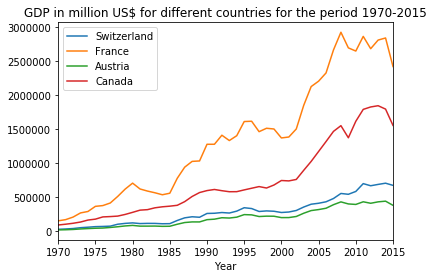

In [199]:
select_switzerland = df_useful["GDP"]['Area']=='Switzerland'
select_france = df_useful["GDP"]['Area']=='France'
select_austria = df_useful["GDP"]['Area']=='Austria'
select_canada = df_useful["GDP"]['Area']=='Canada'
ax = df_useful["GDP"][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

For dissolute or new countries, we have some Nan values (before appearing or after dissolution) as in this next example :

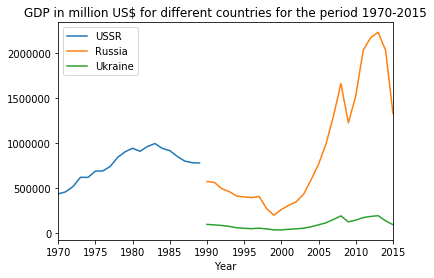

In [200]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

##### 1.D.a.ii. Extracting crops harvested area, production, seed and yield from the "Crops production" dataset<a name="1Daii"></a>
We want to extract crops **harvested area**, **production**, **seed** and **yield** from the **"Crops production" dataset**. As all crops are not food crops, we request the [World crops database](https://world-crops.com/food-crops/) to **keep only the food crops**.

In [201]:
def get_food_crops():
    #Return a list of crops categorized as food crops https://world-crops.com/food-crops/
    url="https://world-crops.com/food-crops/"
    r=requests.get(url,headers={"User-Agent": "XY"})
    soup=BeautifulSoup(r.text,'html.parser')
    elements_temp=soup.find_all('a',href=re.compile("^../"))
    elements=[el.text for el in elements_temp]
    
    #only 40 elements are displayed on each page->iterating on the total list
    for i in range(40,401,40):
        url_i=url+"?ss="+str(i)
        r=requests.get(url_i,headers={"User-Agent":"XY"})
        soup=BeautifulSoup(r.text,'html.parser')
        new_elements=soup.find_all('a',href=re.compile("^../"))
        elements+=[el.text for el in new_elements]
    return elements

def inclusive_search(string,elements):
    #returns true if the string can be found in elements. The search removes special characters from string in order to include more positive results
    string=string.lower()
    delimiters = ",", "(","&",")"," and "," "
    pattern = '|'.join(map(re.escape, delimiters))
    strings=list(filter(None,re.split(pattern,string)))
    found=False
    for s in strings:
        if s=="nes":
            continue
        for el in elements:
            found=(s in el.split())
            if found==False and s[-1]=="s":
                found=s[:-1] in el.split()
            if found==False and s[-2:]=="es":
                found=s[:-2] in el.split()
            if found==False and s[-3:]=="ies":
                found=s[:-3]+"y" in el.split()
            if found==True:
                return found
    return found


def get_food_crop_data(df):    
    #extracts the food crop data, returns 4 df: Area,Production,Seed and yield    
    df=df.copy()
    food_crops=list(map(lambda x: x.lower(),get_food_crops()))              
    crop_types_df=df[['Item','Value']].groupby('Item').sum()
    crop_types_df=crop_types_df[list(map(lambda x : inclusive_search(x,food_crops) , crop_types_df.index ))]   
    food_crop_df=df[df.Item.apply(lambda x: x in crop_types_df.index)]
    return (food_crop_df[food_crop_df.Element=='Area harvested'],
            food_crop_df[food_crop_df.Element=='Production'],
            food_crop_df[food_crop_df.Element=='Seed'],
            food_crop_df[food_crop_df.Element=='Yield'])
  
food_crop_area_df , food_crop_production_df , food_crop_seed_df , food_crop_yield_df = get_food_crop_data(df["Crops production"])

In [202]:
df_useful['Crops Production'] = food_crop_production_df.drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

We check everything is fine by looking at samples for each of the new dataframes:

In [203]:
display('Crops Production', df_useful['Crops Production'].sample(5))

'Crops Production'

Area Code                               Area  \
2376099       5404                     Western Europe   
215536         239             British Virgin Islands   
376554         214          China, Taiwan Province of   
575642          60                        El Salvador   
2556531       5815  Low Income Food Deficit Countries   

                                       Item  Year    Unit      Value  
2376099                         Watermelons  1972  tonnes     5014.0  
215536              Fruit excl Melons,Total  1976  tonnes      450.0  
376554   Leeks, other alliaceous vegetables  1986  tonnes    23151.0  
575642                             Tomatoes  2006  tonnes    35886.0  
2556531                         Peas, green  2000  tonnes  2835532.0

We also make some plots to have a first understanding of the dataset:

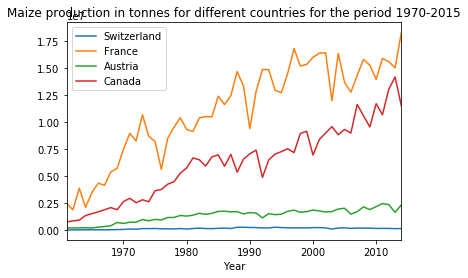

In [204]:
select_Maize = df_useful['Crops Production']['Item']=='Maize'
maize_df = df_useful['Crops Production'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize production in tonnes for different countries for the period 1970-2015')

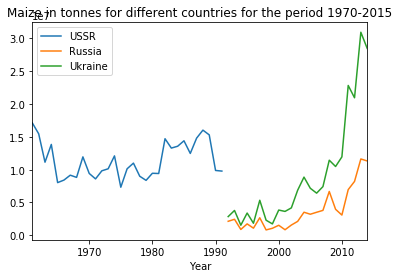

In [205]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize in tonnes for different countries for the period 1970-2015')

##### 1.D.a.iii. Extracting stocks production from the "Livestock production" dataset<a name="1Daiii"></a>

We want to extract **stocks production** from the **"Livestock production" dataset**. Again, we drop the columns that are useless for us and have a first look of the data with a sample and some plots.

In [206]:
selection_stocks = df['Livestock production']["Element"] == 'Stocks'
df_useful['Livestock production'] = df['Livestock production'][selection_stocks].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [207]:
display(df_useful['Livestock production'].sample(5))

Area Code                                     Area             Item  \
60478         106                                    Italy           Horses   
101679        193                    Sao Tome and Principe  Sheep and Goats   
76686         142                               Montserrat            Asses   
104629        200                                Singapore    Poultry Birds   
160634       5817  Net Food Importing Developing Countries           Camels   

        Year       Unit       Value  
60478   2003       Head    290000.0  
101679  2006       Head      8200.0  
76686   2008       Head       400.0  
104629  1966  1000 Head      3600.0  
160634  1998       Head  16872424.0

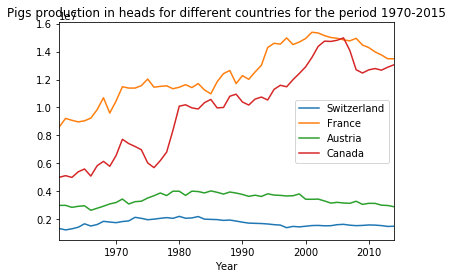

In [208]:
select_pigs = df_useful['Livestock production']['Item']=='Pigs'
pigs_df = df_useful['Livestock production'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

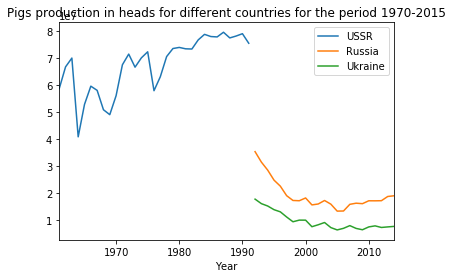

In [209]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs production in heads for different countries for the period 1970-2015')

##### 1.D.a.iv. Extracting import and export quantities from the "Live animals trade" and "Crops trade" datasets<a name="1Daiv"></a>
Now, we extract **import and export quantities** from the **"Live animals trade" and "Crops trade" datasets**, having again some samples and some plots.

In [210]:
selection_import_quantities = df['Live animals trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Live animals trade']["Element"] == 'Export Quantity'

df_useful['Live animals import quantities'] = df['Live animals trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Live animals export quantities'] = df['Live animals trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [211]:
display(df_useful['Live animals import quantities'].sample(5))

Area Code                                     Area              Item  \
532687       5100                                   Africa             Ducks   
622281       5500                                  Oceania  Animals live nes   
661725       5817  Net Food Importing Developing Countries             Sheep   
202111         90                                   Guinea             Ducks   
167794         66                                     Fiji            Horses   

        Year       Unit      Value  
532687  1985  1000 Head        6.0  
622281  2007       Head        0.0  
661725  2000       Head  1718683.0  
202111  1969  1000 Head        NaN  
167794  1996       Head        0.0

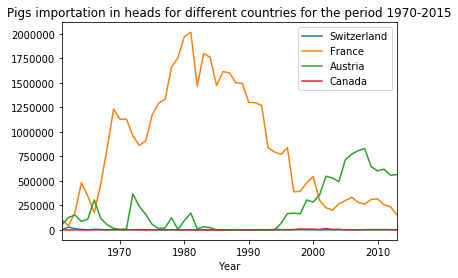

In [212]:
select_pigs = df_useful['Live animals import quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals import quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs importation in heads for different countries for the period 1970-2015')

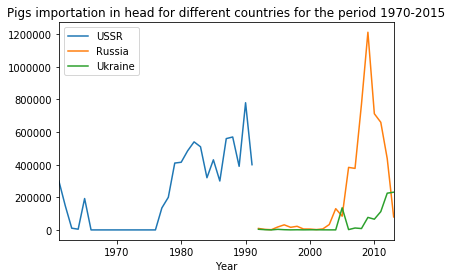

In [213]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs importation in head for different countries for the period 1970-2015')

In [214]:
display(df_useful['Live animals export quantities'].sample(5))

Area Code                       Area      Item  Year       Unit  \
642479       5801  Least Developed Countries    Camels  1984       Head   
623755       5500                    Oceania  Chickens  1997  1000 Head   
620316       5404             Western Europe     Mules  1978       Head   
528863       5000                      World     Mules  1977       Head   
266773        122                    Lesotho    Cattle  2013       Head   

          Value  
642479  43032.0  
623755    646.0  
620316    199.0  
528863    596.0  
266773    646.0

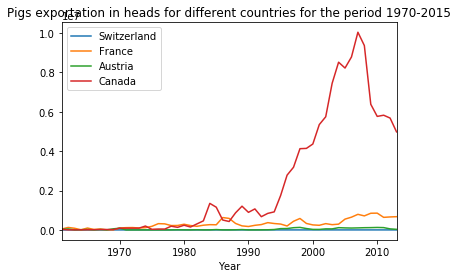

In [215]:
select_pigs = df_useful['Live animals export quantities']['Item']=='Pigs'
pigs_df = df_useful['Live animals export quantities'][select_pigs]

select_switzerland = pigs_df['Area']=='Switzerland'
select_france = pigs_df['Area']=='France'
select_austria = pigs_df['Area']=='Austria'
select_canada = pigs_df['Area']=='Canada'
ax = pigs_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

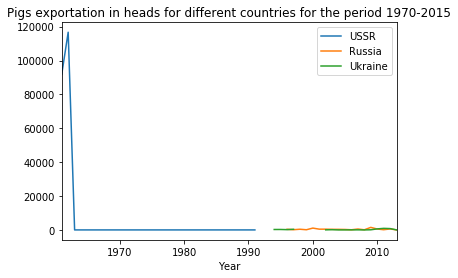

In [216]:
select_USSR = pigs_df['Area']=='USSR'
select_russia = pigs_df['Area']=='Russian Federation'
select_ukraine = pigs_df['Area']=='Ukraine'
ax = pigs_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = pigs_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = pigs_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Pigs exportation in heads for different countries for the period 1970-2015')

In [217]:
selection_import_quantities = df['Food trade']["Element"] == 'Import Quantity'
selection_export_quantities = df['Food trade']["Element"] == 'Export Quantity'

df_useful['Food import quantities'] = df['Food trade'][selection_import_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])
df_useful['Food export quantities'] = df['Food trade'][selection_export_quantities].drop(columns=['Item Code', "Element Code", "Element", "Year Code", "Flag"])

In [218]:
display(df_useful['Food import quantities'].sample(5))

Area Code      Area                     Item  Year    Unit     Value
4316495          84    Greece                    Maize  1987  tonnes  462066.0
5225867         104   Ireland                Triticale  1985  tonnes     212.0
7011933         147   Namibia           Natural Rubber  1998  tonnes       NaN
4726866          95  Honduras  Tobacco, unmanufactured  1979  tonnes     319.0
12854057       5300      Asia               Other Meat  1984  tonnes  138014.0

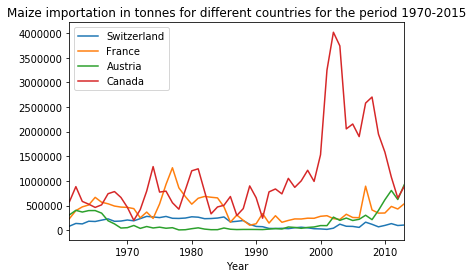

In [219]:
select_Maize = df_useful['Food import quantities']['Item']=='Maize'
maize_df = df_useful['Food import quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

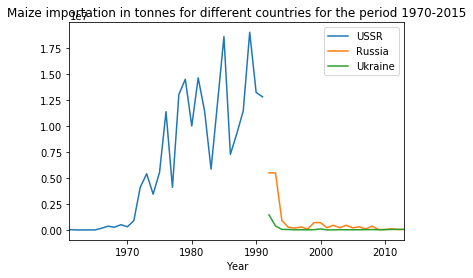

In [220]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize importation in tonnes for different countries for the period 1970-2015')

In [221]:
display(df_useful['Food export quantities'].sample(5))

Area Code             Area                         Item  Year  \
12042074       5102    Middle Africa                    Meat, pig  2003   
14112526       5706   European Union         Fixed Vegetable Oils  1984   
2361622          41  China, mainland                  Cake, copra  1992   
6815028         143          Morocco              Oil, boiled etc  1988   
2156217         351            China  Flour, roots and tubers nes  1962   

            Unit      Value  
12042074  tonnes        6.0  
14112526  tonnes  3900495.0  
2361622   tonnes      116.0  
6815028   tonnes        NaN  
2156217   tonnes       86.0

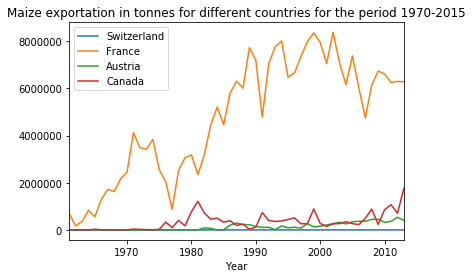

In [222]:
select_Maize = df_useful['Food export quantities']['Item']=='Maize'
maize_df = df_useful['Food export quantities'][select_Maize]

select_switzerland = maize_df['Area']=='Switzerland'
select_france = maize_df['Area']=='France'
select_austria = maize_df['Area']=='Austria'
select_canada = maize_df['Area']=='Canada'
ax = maize_df[select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

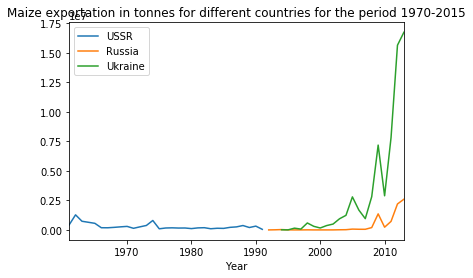

In [223]:
select_USSR = maize_df['Area']=='USSR'
select_russia = maize_df['Area']=='Russian Federation'
select_ukraine = maize_df['Area']=='Ukraine'
ax = maize_df[select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = maize_df[select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = maize_df[select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('Maize exportation in tonnes for different countries for the period 1970-2015')

##### 1.D.a.v. Extracting average CPI of each year from the "Consumer price indices" dataset<a name="1Dav"></a>

The **"Consumer price indices" dataset** contains **monthly data**. In order to have a **uniform dataframe**, and as other dataframes have **yearly data**, we will group it by (Country, Year) and compute the monthly mean for every year. Then we add a column to show the relative change in CPI, as this is what measures inflation, according to the following formula:

$$\frac{CPI_t - CPI_{t-1}}{CPI_{t-1}}$$

In [224]:
df_useful['Consumer price indices'] =  df['Consumer price indices'][['Area','Year','Value']] \
                                        .dropna() \
                                        .groupby(['Area',"Year"]) \
                                        .mean() \
                                        .reset_index() \
                                        .dropna()

In [225]:

#We calculate the relative change in CPI for each year relative to last years CPI - this indicates yearly inflation. The first year in each area is set to 0.


df_useful['Consumer price indices']['Value'] = np.where(df_useful['Consumer price indices']['Area'] == df_useful['Consumer price indices']['Area'].shift(1),
         ((df_useful['Consumer price indices']['Value'] - df_useful['Consumer price indices']['Value'].shift(1))/df_useful['Consumer price indices']['Value'].shift(1)) * 100, 0)




In [226]:
display(df_useful['Consumer price indices'].head(5))

Area  Year      Value
0  Afghanistan  2004   0.000000
1  Afghanistan  2005  11.606340
2  Afghanistan  2006   7.254896
3  Afghanistan  2007   8.482889
4  Afghanistan  2008  30.554940

With samples and plots, we remark that this dataset **only starts in 2000** wheareas other ones start in 1970.

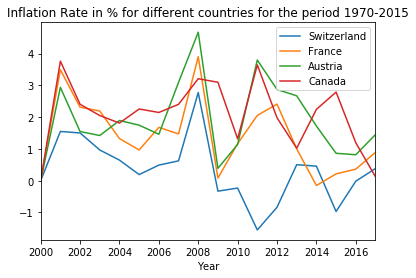

In [227]:
select_switzerland = df_useful['Consumer price indices']['Area']=='Switzerland'
select_france = df_useful['Consumer price indices']['Area']=='France'
select_austria = df_useful['Consumer price indices']['Area']=='Austria'
select_canada = df_useful['Consumer price indices']['Area']=='Canada'
ax = df_useful['Consumer price indices'][select_switzerland].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful['Consumer price indices'][select_france].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_austria].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful['Consumer price indices'][select_canada].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["Switzerland", 'France', 'Austria', "Canada"])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

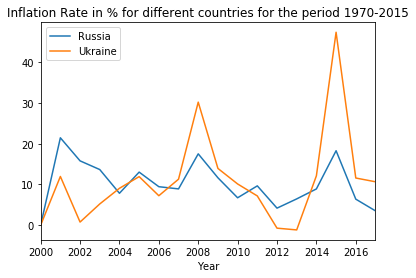

In [228]:
select_russia = df_useful["Consumer price indices"]['Area']=='Russian Federation'
select_ukraine = df_useful["Consumer price indices"]['Area']=='Ukraine'
ax = df_useful["Consumer price indices"][select_russia].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["Consumer price indices"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(['Russia', 'Ukraine'])
_ = ax.set_title('Inflation Rate in % for different countries for the period 1970-2015')

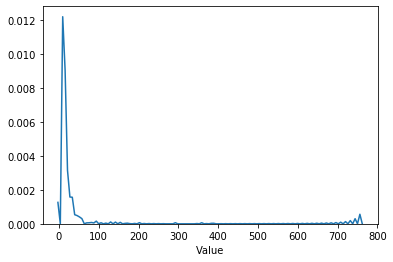

In [229]:
_ = sns.distplot(abs(df_useful["Consumer price indices"]["Value"]), rug=False, hist=False)

In [230]:
#looking at the cases where food prices increased over 100% during one year
df_useful["Consumer price indices"].loc[df_useful["Consumer price indices"]["Value"] > 100]

Area  Year       Value
55                                Angola  2001  152.561015
56                                Angola  2002  108.897433
851     Democratic Republic of the Congo  2001  359.936605
1280                              Guinea  2010  292.596028
2636               Sao Tome and Principe  2014  759.321212
2801                     Solomon Islands  2012  203.559117
2833                         South Sudan  2016  386.378414
2834                         South Sudan  2017  130.056890
3283  Venezuela (Bolivarian Republic of)  2015  171.224360
3284  Venezuela (Bolivarian Republic of)  2016  142.586732

It seems that the formula calculating food price inflation is actually correct. These are realistic cases where the price increased by over 100% in the span of a year. 

##### 1.D.a.vi. Removing areas which are not countries <a name="1Davi"></a>

Having a more detailled look at the dataset, we have remarked that the **areas which are real countries** are exactely the ones with an "Area Code" below $5000$ but not in $[261, 269]$.

In [231]:
#remove Area code >= 5000 or in [261, 269] (EU)
for df_name in df_useful :
    if 'Area Code' in df_useful[df_name].keys() : 
        print ("Removing areas which are not countries in", df_name)
        selection_countries = df_useful[df_name]['Area Code']<261 
        selection_countries = selection_countries | (df_useful[df_name]['Area Code']>269)
        selection_countries = selection_countries & (df_useful[df_name]['Area Code']<5000)
        df_useful[df_name] = df_useful[df_name][selection_countries]
        display(df_useful[df_name].sample(5))
    else :
        print (df_name, "is already clean")

Removing areas which are not countries in GDP


Area Code            Area  Year        Value
449191        207        Suriname  1972   424.052101
446908        206  Sudan (former)  1982  5807.458789
254395        113      Kyrgyzstan  2003  1921.529267
487758        227          Tuvalu  1993     9.578664
235245        109         Jamaica  1988  4017.538356

Removing areas which are not countries in Crops Production


Area Code                                   Area  \
542038          58                                Ecuador   
1644972        216                               Thailand   
1129853        143                                Morocco   
1191723        150                            Netherlands   
486822         116  Democratic People's Republic of Korea   

                                  Item  Year    Unit     Value  
542038                Lemons and limes  1978  tonnes   15930.0  
1644972                        Oranges  1978  tonnes  175000.0  
1129853  Broad beans, horse beans, dry  1987  tonnes  127260.0  
1191723                        Spinach  1999  tonnes   39000.0  
486822          Eggplants (aubergines)  1993  tonnes   40000.0

Removing areas which are not countries in Livestock production


Area Code        Area             Item  Year       Unit       Value
7985          16  Bangladesh        Buffaloes  1994       Head    874000.0
75356        138      Mexico             Pigs  2010       Head  15435412.0
66568        121     Lebanon    Poultry Birds  1987  1000 Head     21500.0
85161        159     Nigeria  Sheep and Goats  1981       Head  20803000.0
76946        142  Montserrat            Sheep  1998       Head      4700.0

Removing areas which are not countries in Live animals import quantities


Area Code               Area               Item  Year       Unit  \
56939          20           Botswana          Buffaloes  1979       Head   
14914           9          Argentina  Rabbits and hares  1982  1000 Head   
377514        117  Republic of Korea              Mules  1982       Head   
484871        229     United Kingdom              Sheep  1983       Head   
507443        249              Yemen    Sheep and Goats  1968       Head   

           Value  
56939        NaN  
14914     1265.0  
377514       NaN  
484871   46987.0  
507443  322770.0

Removing areas which are not countries in Live animals export quantities


Area Code           Area             Item  Year       Unit  Value
51337          18         Bhutan            Goats  2000       Head    NaN
426981        203          Spain            Goats  1974       Head  779.0
298035        138         Mexico         Chickens  2003  1000 Head    0.0
205012        175  Guinea-Bissau  Bovine, Animals  2008       Head    0.0
315335        149          Nepal            Ducks  1975  1000 Head    NaN

Removing areas which are not countries in Food import quantities


Area Code            Area                    Item  Year    Unit  \
7002618        147         Namibia               Whey, dry  2011  tonnes   
6047334        124           Libya         Coffee, roasted  1986  tonnes   
5989346        121         Lebanon  Fodder & Feeding stuff  1980  tonnes   
9655371        206  Sudan (former)                   Dates  1966  tonnes   
9960909        211     Switzerland              Sugar beet  1976  tonnes   

           Value  
7002618      0.0  
6047334     22.0  
5989346  39900.0  
9655371   2949.0  
9960909    849.0

Removing areas which are not countries in Food export quantities


Area Code                                Area  \
4113512          73                             Georgia   
6161795         129                          Madagascar   
11224541        236  Venezuela (Bolivarian Republic of)   
2920941          49                                Cuba   
7000135         147                             Namibia   

                               Item  Year    Unit  Value  
4113512            Olives preserved  2005  tonnes    0.0  
6161795            Fruit, dried nes  1963  tonnes    NaN  
11224541                 Other Meat  1998  tonnes   20.0  
2920941         Sugar confectionery  1980  tonnes    0.0  
7000135   Vegetables, preserved nes  1966  tonnes    NaN

Consumer price indices is already clean


#### 1.D.b. Handling of the missing data  <a name="1Db"></a>

In this section, we will explain how we will handle the missing data in previous dataframes for maps.

##### 1.D.b.i. Highlighting the problem  <a name="1Dbi"></a> 

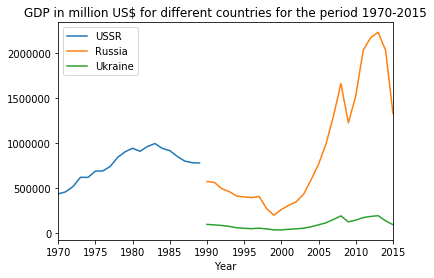

In [232]:
select_USSR = df_useful["GDP"]['Area']=='USSR'
select_russia = df_useful["GDP"]['Area']=='Russian Federation'
select_ukraine = df_useful["GDP"]['Area']=='Ukraine'
ax = df_useful["GDP"][select_USSR].plot(x ='Year', y='Value', kind = 'line')
ax = df_useful["GDP"][select_russia].plot(x ='Year', y='Value', kind = 'line', ax = ax)
ax = df_useful["GDP"][select_ukraine].plot(x ='Year', y='Value', kind = 'line', ax = ax)
_ = ax.legend(["USSR", 'Russia', 'Ukraine'])
_ = ax.set_title('GDP in million US$ for different countries for the period 1970-2015')

In order to **vizualize folium maps**, we need to **associate each country a value**. The geojson file that we use is not timestamped and **only countries that exist nowadays** are inside it. As **some countries has been dissolved** during the past 50 years, our folium maps won't be complete. For instance, we do not have any value for Ukraine from 1970 to 1989. Our idea to fix this issue is presented in the next paragraph.

##### 1.D.b.ii. Proposed correction  <a name="1Dbii"></a> 


Our idea is to **map the former country value to each of the current ones**. For instance in 1982, USSR GDP is around one trillion \\$. Therefore, if we associate (**only for folium map purposes**) this value to each current country that succeeded USSR, **all these countries will appear the same color** in the folium map, i.e. all the USSR area will appear the same color (and the good one).

In order to do so, one need to **identify which countries appeared and disappeared** from the dataset and **at which year**. Then we will use this result along with some **historical research** in our `visualise_world_data_folium` function ([1.E.a.](#1Ea)).

In [233]:
countries_formation_years = {}
for country in df_useful["GDP"]["Area"].unique():
    selection = df_useful["GDP"]["Area"] == country
    year_in, year_out = df_useful["GDP"][selection].dropna()["Year"].min(), df_useful["GDP"][selection].dropna()["Year"].max()
    for year in (year_in, year_out):
        if year not in countries_formation_years :
            countries_formation_years[year] = []
    countries_formation_years[year_in].append((country,'+'))
    countries_formation_years[year_out].append((country,'-'))

countries_formation_years.pop(1970)
countries_formation_years.pop(2015)
for year in sorted(list(countries_formation_years)):
    print (year, countries_formation_years[year])

1988 [('Yemen Ar Rp', '-'), ('Yemen Dem', '-')]
1989 [('Czechoslovakia', '-'), ('Ethiopia PDR', '-'), ('USSR', '-'), ('Yemen', '+'), ('Yugoslav SFR', '-')]
1990 [('Armenia', '+'), ('Azerbaijan', '+'), ('Belarus', '+'), ('Bosnia and Herzegovina', '+'), ('Croatia', '+'), ('Czechia', '+'), ('Eritrea', '+'), ('Estonia', '+'), ('Ethiopia', '+'), ('Georgia', '+'), ('Kazakhstan', '+'), ('Kyrgyzstan', '+'), ('Latvia', '+'), ('Lithuania', '+'), ('Montenegro', '+'), ('Republic of Moldova', '+'), ('Russian Federation', '+'), ('Serbia', '+'), ('Slovakia', '+'), ('Slovenia', '+'), ('Tajikistan', '+'), ('The former Yugoslav Republic of Macedonia', '+'), ('Timor-Leste', '+'), ('Turkmenistan', '+'), ('Ukraine', '+'), ('Uzbekistan', '+')]
1999 [('Kosovo', '+')]
2005 [('Curaçao', '+'), ('Sint Maarten (Dutch Part)', '+')]
2007 [('Sudan (former)', '-')]
2008 [('South Sudan', '+'), ('Sudan', '+')]
2012 [('Netherlands Antilles (former)', '-')]


### 1.E. Preprocessing the data set  <a name="1E"></a>

In this part, we will finish prepocessing the datasets. More precisely, we will deal with **country names** and **normalizing** the features.

1.  
    5. 
    
        1. [Converting country names between different naming conventions](#1Ea)
        
        2. [Normalization and log scales](#1Eb)

#### 1.E.a. Converting country names between different naming conventions  <a name="1Ea"></a>
Some countries have **different names in the geojson file and in the dataset**. We first start by correcting them.

In [234]:
# Useful method for name correction
def correct_country_names(old_name, dic):
    if old_name in dic.keys() :
        return dic[old_name]
    return old_name

In [235]:
# Declaring dictionary with name correction
dic = {'Czechia': "Czech Republic",
       'Russian Federation':'Russia',
       "Serbia":"Republic of Serbia",
       'The former Yugoslav Republic of Macedonia':'Macedonia',
       'China, mainland':'China',
       'Viet Nam':'Vietnam',
       'Venezuela (Bolivarian Republic of)':'Venezuela',
       'Iran (Islamic Republic of)':'Iran',
       'Syrian Arab Republic':"Syria",
       'Bolivia (Plurinational State of)': 'Bolivia',
       "Côte d'Ivoire": "Ivory Coast",
       'Congo':"Republic of the Congo",
       "Lao People's Democratic Republic":'Laos',
       "Democratic People's Republic of Korea":"North Korea",
       'Republic of Korea':"South Korea",
       'USSR':['Armenia',
               'Azerbaijan',
               'Belarus',
               'Estonia',
               'Georgia',
               'Kazakhstan',
               'Kyrgyzstan',
               'Latvia',
               'Lithuania',
               'Montenegro',
               'Republic of Moldova',
               'Russia',
               'Republic of Serbia',
               'Timor-Leste',
               'Turkmenistan',
               'Ukraine',
               'Uzbekistan'],
       'Ethiopia PDR':['Eritrea','Ethiopia'],
       'Yugoslav SFR':['Kosovo', 'Slovenia', 'Croatia','Macedonia', 'Bosnia and Herzegovina'],
       'Yemen Dem':['Yemen'],
       'Czechoslovakia':["Czech Republic", 'Slovakia'],
       'Netherlands Antilles (former)':['Curaçao', 'Sint Maarten (Dutch Part)'],
       'Sudan (former)':['South Sudan', 'Sudan']}

# Correcting each DataFrame
for df_name in df_useful :
    print (df_name)
    df_useful[df_name]["Area"] = df_useful[df_name]["Area"].apply(lambda x : correct_country_names(x,dic))
    df_useful[df_name]=df_useful[df_name].explode('Area')

GDP
Crops Production
Livestock production
Live animals import quantities
Live animals export quantities
Food import quantities
Food export quantities
Consumer price indices


Then, we do a function that takes as input **a dataframe and a year** and produces the **corresponding folium map**. This function also h**andles dissolutions of countries** as suggested [before](#1Dbii).

In [236]:
import matplotlib.colors as colors

def visualise_world_data_folium(df, to_visualise, year, units="", log=True,log2=False):
    
    if log2:
        log=False
    if log:
        log2=False
        
    # Defining color palette
    color_scale = sns.cubehelix_palette(9, start=.7, rot=-.9)
    
    # importing geojson and transforming to pandas
    geo_data=json.load(open("Scripts/Data/world-countries.json"))
    dics=geo_data['features']
    clean_dics=[]
    for country in dics:
        clean_dics.append({'Country':country['properties']['name'],
                          'geometry':country['geometry']})
    geo_df=pd.DataFrame(clean_dics)
    
    # cropping to df to data of interest
    df_visu=df[df.Year==year][['Area',to_visualise]]

    # Merging with geo data
    df_visu=geo_df.merge(df_visu,how='left',left_on='Country',right_on='Area')
    df_visu=df_visu.dropna()
    
    if log:
        df_visu['to_plot']=df_visu[to_visualise].apply(lambda x : np.log10(x))
        
    def log2_scale(x):
        out=np.sign(x)*np.log10(1+np.abs(x))
        return out
        
    if log2:
        df_visu['to_plot']=df_visu[to_visualise].apply(log2_scale)
    
    # creating bins for color scaling
    ma_value=df_visu['to_plot'].max()
    mi_value=df_visu['to_plot'].min()
    bins=np.linspace(mi_value,ma_value,8)
    
    # creating Json string for folium
    features=[]
    for _,row in df_visu.iterrows():
        color=np.digitize(row['to_plot'],bins)
        val=row[to_visualise]
        feature={
            'type' : 'Feature',
            
            'properties':{'Country':row['Country'],
                          '{}'.format(units): '{:.2E}'.format(val),
                          'color':colors.to_hex(color_scale[color])},
            'geometry':row['geometry']
            }
        features.append(feature)
    
    def style(feature):
        
        if feature['properties'][units]==np.nan:
            opac=0
        else:
            opac=0.8
        return {'fillOpacity':opac,
                   'weight':0.1,
                   'fillColor':feature['properties']['color']}
    geo_data=(folium.GeoJson({'type':'FeatureCollection','features':features},
                             style_function=style,
                             tooltip=folium.features.GeoJsonTooltip(['Country','{}'.format(units)])))
    m=folium.Map()
    geo_data.add_to(m)
    return m

We can know use it to produce some maps. For instance, we plot below the map of GDP for the year 1985 (before dissolution of USSR) and 1995 (after).

In [237]:
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1985,'GDP [Mil USD]' ,True))
display(visualise_world_data_folium(df_useful["GDP"], 'Value', 1995,'GDP [Mil USD]' ,True))

#### 1.E.b. Normalization and log scales  <a name="1Eb"></a>

Some of our features **seem to be right skewed**. At first glance it seems that they look like power laws.

For instance the distribution of GDP look a bit like a power law:

//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/envs/ada/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


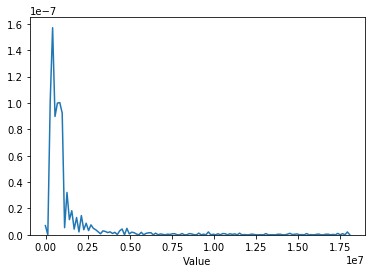

In [238]:
_ = sns.distplot(df_useful["GDP"]["Value"], rug=False, hist=False)

As we later want to train some Machine Learning models, we log those values so that their distribution look a bit **more like a normal distribution**.

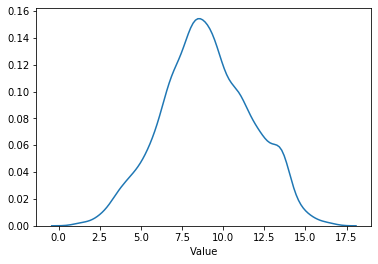

In [239]:
#looks better with log scale
_ = sns.distplot(np.log(df_useful["GDP"]["Value"]), rug=False, hist=False)

The new distribution indeed looks better to train models on it.

### 1.F. Making one uniformized dataframe  <a name="1F"></a>

In this part, we will make one **uniformized dataframe** `uni_df` with the following columns.


    Country | Year | GDP | Crops production columns | Livestock production columns | Crops importation columns | Livestock importation columns | Crops exportation columns | Livestock exportation columns | CPI
    
In this uniformized dataframe, **a tuple `(Country, Year)` uniquely identifies a row**.


#### 1.F.a. Pivoting dataframes with items  <a name="1Fa"></a>

The current dataframes have several rows for a given `(Country, Year)`. Each of this row correspond to one item. We would like to have a unique row for a given `(Country, Year)` and one column per item:

In [240]:
need_pivot = ['Crops Production',
              'Livestock production',
              'Live animals import quantities',
              'Live animals export quantities',
              'Food import quantities',
              'Food export quantities']

def rename_columns(x, word):
    if x not in ['Area', 'Year', 'ha', 'tonnes', 'hg/ha', 'Head', '1000 Head']:
        return x + ' ' + word
    return x

df_useful['GDP'] = df_useful['GDP'].rename(columns = {'Value':'(GDP, million $)'})[["Area",'Year','(GDP, million $)']]
df_useful['Consumer price indices'] = df_useful['Consumer price indices'].rename(columns = {'Value':'(Consumer price indices, %)'})[["Area",'Year','(Consumer price indices, %)']]

for df_name in need_pivot :
    df_useful[df_name] = pd.pivot_table(df_useful[df_name], index=["Area",'Year'], columns=["Item","Unit"], values="Value").rename(columns=lambda x: rename_columns(x, df_name))
    display(df_name, df_useful[df_name].sample(5))

'Crops Production'

Item               Anise, badian, fennel, coriander Crops Production  \
Unit                                                          tonnes   
Area          Year                                                     
Cambodia      2013                                               NaN   
Mauritius     1999                                               NaN   
Faroe Islands 2001                                               NaN   
Chad          1970                                               NaN   
Réunion       2014                                               NaN   

Item               Apples Crops Production Apricots Crops Production  \
Unit                                tonnes                    tonnes   
Area          Year                                                     
Cambodia      2013                     NaN                       NaN   
Mauritius     1999                     NaN                       NaN   
Faroe Islands 2001                     NaN                       NaN   
Chad          1970                     NaN                       NaN   
Réunion       2014                    62.0                       NaN   

Item               Areca nuts Crops Production Artichokes Crops Production  \
Unit                                    tonnes                      tonnes   
Area          Year                                                           
Cambodia      2013                         NaN                         NaN   
Mauritius     1999                         NaN                         NaN   
Faroe Islands 2001                         NaN                         NaN   
Chad          1970                         NaN                         NaN   
Réunion       2014                         NaN                       277.0   

Item               Asparagus Crops Production Avocados Crops Production  \
Unit                                   tonnes                    tonnes   
Area          Year                                                        
Cambodia      2013                        NaN                       NaN   
Mauritius     1999                        NaN                       NaN   
Faroe Islands 2001                        NaN                       NaN   
Chad          1970                        NaN                       NaN   
Réunion       2014                      104.0                     691.0   

Item               Bambara beans Crops Production Bananas Crops Production  \
Unit                                       tonnes                   tonnes   
Area          Year                                                           
Cambodia      2013                            NaN                 125889.0   
Mauritius     1999                            NaN                   7550.0   
Faroe Islands 2001                            NaN                      NaN   
Chad          1970                            NaN                      NaN   
Réunion       2014                            NaN                   9540.0   

Item               Barley Crops Production  ...  \
Unit                                tonnes  ...   
Area          Year                          ...   
Cambodia      2013                     NaN  ...   
Mauritius     1999                     NaN  ...   
Faroe Islands 2001                     NaN  ...   
Chad          1970                     NaN  ...   
Réunion       2014                     NaN  ...   

Item               Sweet potatoes Crops Production  \
Unit                                        tonnes   
Area          Year                                   
Cambodia      2013                         49006.0   
Mauritius     1999                           400.0   
Faroe Islands 2001                             NaN   
Chad          1970                         25000.0   
Réunion       2014                          1237.0   

Item               Tangerines, mandarins, clementines, satsumas Crops Production  \
Unit                                                                 

'Livestock production'

Item                           Animals live nes Livestock production  \
Unit                                                            Head   
Area                      Year                                         
Cook Islands              2001                                   NaN   
Saint Pierre and Miquelon 1996                                   NaN   
Slovakia                  1970                                   NaN   
Guadeloupe                1982                                   NaN   
Eritrea                   2004                                   NaN   

Item                           Asses Livestock production  \
Unit                                                 Head   
Area                      Year                              
Cook Islands              2001                        NaN   
Saint Pierre and Miquelon 1996                        NaN   
Slovakia                  1970                        NaN   
Guadeloupe                1982                      480.0   
Eritrea                   2004                        NaN   

Item                           Beehives Livestock production  \
Unit                                 No Livestock production   
Area                      Year                                 
Cook Islands              2001                          20.0   
Saint Pierre and Miquelon 1996                           NaN   
Slovakia                  1970                     1060538.0   
Guadeloupe                1982                         800.0   
Eritrea                   2004                           NaN   

Item                           Buffaloes Livestock production  \
Unit                                                     Head   
Area                      Year                                  
Cook Islands              2001                            NaN   
Saint Pierre and Miquelon 1996                            NaN   
Slovakia                  1970                            NaN   
Guadeloupe                1982                            NaN   
Eritrea                   2004                            NaN   

Item                           Camelids, other Livestock production  \
Unit                                                           Head   
Area                      Year                                        
Cook Islands              2001                                  NaN   
Saint Pierre and Miquelon 1996                                  NaN   
Slovakia                  1970                                  NaN   
Guadeloupe                1982                                  NaN   
Eritrea                   2004                                  NaN   

Item                           Camels Livestock production  \
Unit                                                  Head   
Area                      Year                               
Cook Islands              2001                         NaN   
Saint Pierre and Miquelon 1996                         NaN   
Slovakia                  1970                         NaN   
Guadeloupe                1982                         NaN   
Eritrea                   2004                    330220.0   

Item                           Cattle Livestock production  \
Unit                                                  Head   
Area                      Year                               
Cook Islands              2001                       160.0   
Saint Pierre and Miquelon 1996                         NaN   
Slovakia                  1970                   4222576.0   
Guadeloupe                1982                     90000.0   
Eritrea                   2004                   1930000.0   

Item                           Cattle and Buffaloes Livestock production  \
Unit                                                                Head   
Area                      Year                                             
Cook Islands              2001                                     160.0   
Saint Pierre and Miquelon 1996   

'Live animals import quantities'

Item                             Animals live nes Live animals import quantities  \
Unit                                                                        Head   
Area                        Year                                                   
Norway                      2001                                             NaN   
Panama                      1989                                             NaN   
United Republic of Tanzania 1984                                             0.0   
United Arab Emirates        1976                                             NaN   
Samoa                       2007                                             NaN   

Item                             Asses Live animals import quantities  \
Unit                                                             Head   
Area                        Year                                        
Norway                      2001                                  0.0   
Panama                      1989                                  NaN   
United Republic of Tanzania 1984                                  0.0   
United Arab Emirates        1976                                  NaN   
Samoa                       2007                                  NaN   

Item                             Beehives Live animals import quantities  \
Unit                                   No Live animals import quantities   
Area                        Year                                           
Norway                      2001                                     NaN   
Panama                      1989                                     NaN   
United Republic of Tanzania 1984                                     NaN   
United Arab Emirates        1976                                     NaN   
Samoa                       2007                                     NaN   

Item                             Bovine, Animals Live animals import quantities  \
Unit                                                                       Head   
Area                        Year                                                  
Norway                      2001                                           14.0   
Panama                      1989                                            0.0   
United Republic of Tanzania 1984                                            0.0   
United Arab Emirates        1976                                          168.0   
Samoa                       2007                                            0.0   

Item                             Buffaloes Live animals import quantities  \
Unit                                                                 Head   
Area                        Year                                            
Norway                      2001                                      NaN   
Panama                      1989                                      NaN   
United Republic of Tanzania 1984                                      NaN   
United Arab Emirates        1976                                      NaN   
Samoa                       2007                                      NaN   

Item                             Camelids, other Live animals import quantities  \
Unit                                                                       Head   
Area                        Year                                                  
Norway                      2001                                            NaN   
Panama                      1989                                            NaN   
United Republic of Tanzania 1984                                            NaN   
United Arab Emirates        1976                                            NaN   
Samoa                       2007                                            NaN   

Item                             Camels Live animals import quantities  \
Unit                                                              Head   
Area                        Year      

'Live animals export quantities'

Item                      Animals live nes Live animals export quantities  \
Unit                                                                 Head   
Area                 Year                                                   
Fiji                 1987                                             0.0   
China, Hong Kong SAR 2007                                             0.0   
Sudan                1975                                             0.0   
Tunisia              2000                                             0.0   
Canada               1977                                             NaN   

Item                      Asses Live animals export quantities  \
Unit                                                      Head   
Area                 Year                                        
Fiji                 1987                                  NaN   
China, Hong Kong SAR 2007                                  NaN   
Sudan                1975                                  NaN   
Tunisia              2000                                  0.0   
Canada               1977                                  0.0   

Item                      Beehives Live animals export quantities  \
Unit                            No Live animals export quantities   
Area                 Year                                           
Fiji                 1987                                     NaN   
China, Hong Kong SAR 2007                                     NaN   
Sudan                1975                                     NaN   
Tunisia              2000                                     NaN   
Canada               1977                                     NaN   

Item                      Bovine, Animals Live animals export quantities  \
Unit                                                                Head   
Area                 Year                                                  
Fiji                 1987                                            0.0   
China, Hong Kong SAR 2007                                            0.0   
Sudan                1975                                         1852.0   
Tunisia              2000                                            0.0   
Canada               1977                                       543852.0   

Item                      Buffaloes Live animals export quantities  \
Unit                                                          Head   
Area                 Year                                            
Fiji                 1987                                      NaN   
China, Hong Kong SAR 2007                                      NaN   
Sudan                1975                                      NaN   
Tunisia              2000                                      NaN   
Canada               1977                                      NaN   

Item                      Camelids, other Live animals export quantities  \
Unit                                                                Head   
Area                 Year                                                  
Fiji                 1987                                            NaN   
China, Hong Kong SAR 2007                                            NaN   
Sudan                1975                                            NaN   
Tunisia              2000                                            NaN   
Canada               1977                                            NaN   

Item                      Camels Live animals export quantities  \
Unit                                                       Head   
Area                 Year                                         
Fiji                 1987                                   NaN   
China, Hong Kong SAR 2007                                   NaN   
Sudan                1975                                2000.0   
Tunisia              2000                                   0.0   
Canada               1977                            

'Food import quantities'

Item                             Alfalfa meal and pellets Food import quantities  \
Unit                                                                      tonnes   
Area                        Year                                                   
New Caledonia               2011                                           157.0   
Falkland Islands (Malvinas) 2012                                             NaN   
Yemen                       1999                                             NaN   
British Virgin Islands      2011                                             NaN   
American Samoa              1975                                             NaN   

Item                             Almonds shelled Food import quantities  \
Unit                                                             tonnes   
Area                        Year                                          
New Caledonia               2011                                   22.0   
Falkland Islands (Malvinas) 2012                                    NaN   
Yemen                       1999                                    NaN   
British Virgin Islands      2011                                    NaN   
American Samoa              1975                                    NaN   

Item                             Animal Oil+Fat+Grs Food import quantities  \
Unit                                                                tonnes   
Area                        Year                                             
New Caledonia               2011                                      96.0   
Falkland Islands (Malvinas) 2012                                       NaN   
Yemen                       1999                                       0.0   
British Virgin Islands      2011                                       NaN   
American Samoa              1975                                       NaN   

Item                             Animal Vegetable Oil Food import quantities  \
Unit                                                                  tonnes   
Area                        Year                                               
New Caledonia               2011                                      3283.0   
Falkland Islands (Malvinas) 2012                                         NaN   
Yemen                       1999                                    138102.0   
British Virgin Islands      2011                                         0.0   
American Samoa              1975                                         0.0   

Item                             Animal fats Food import quantities  \
Unit                                                         tonnes   
Area                        Year                                      
New Caledonia               2011                               96.0   
Falkland Islands (Malvinas) 2012                                NaN   
Yemen                       1999                                0.0   
British Virgin Islands      2011                                NaN   
American Samoa              1975                                NaN   

Item                             Anise, badian, fennel, coriander Food import quantities  \
Unit                                                                              tonnes   
Area                        Year                                                           
New Caledonia               2011                                                4.0        
Falkland Islands (Malvinas) 2012                                                NaN        
Yemen                       1999                                              917.0        
British Virgin Islands      2011                                                NaN        
American Samoa              1975                                                NaN        

Item                             Apples Food import quantities  \
Unit                                                    tonnes   
Area                  

'Food export quantities'

Item                       Alfalfa meal and pellets Food export quantities  \
Unit                                                                tonnes   
Area                  Year                                                   
El Salvador           1963                                             NaN   
Ecuador               1975                                             NaN   
Ireland               2001                                            54.0   
Republic of the Congo 1977                                             NaN   
Papua New Guinea      1992                                             NaN   

Item                       Almonds shelled Food export quantities  \
Unit                                                       tonnes   
Area                  Year                                          
El Salvador           1963                                    NaN   
Ecuador               1975                                    NaN   
Ireland               2001                                    1.0   
Republic of the Congo 1977                                    NaN   
Papua New Guinea      1992                                    NaN   

Item                       Animal Oil+Fat+Grs Food export quantities  \
Unit                                                          tonnes   
Area                  Year                                             
El Salvador           1963                                      75.0   
Ecuador               1975                                       NaN   
Ireland               2001                                   47419.0   
Republic of the Congo 1977                                       NaN   
Papua New Guinea      1992                                       NaN   

Item                       Animal Vegetable Oil Food export quantities  \
Unit                                                            tonnes   
Area                  Year                                               
El Salvador           1963                                      3985.0   
Ecuador               1975                                         1.0   
Ireland               2001                                     54488.0   
Republic of the Congo 1977                                         0.0   
Papua New Guinea      1992                                    248987.0   

Item                       Animal fats Food export quantities  \
Unit                                                   tonnes   
Area                  Year                                      
El Salvador           1963                               75.0   
Ecuador               1975                                NaN   
Ireland               2001                            47419.0   
Republic of the Congo 1977                                NaN   
Papua New Guinea      1992                                NaN   

Item                       Anise, badian, fennel, coriander Food export quantities  \
Unit                                                                        tonnes   
Area                  Year                                                           
El Salvador           1963                                                NaN        
Ecuador               1975                                                0.0        
Ireland               2001                                               16.0        
Republic of the Congo 1977                                                NaN        
Papua New Guinea      1992                                                NaN        

Item                       Apples Food export quantities  \
Unit                                              tonnes   
Area                  Year                                 
El Salvador           1963                           NaN   
Ecuador               1975                           NaN   
Ireland               2001                        1788.0   
Republic of the Congo 1977                           NaN   
Papua New Guinea      

Some **Nan values** have appeared. After some analysis, we have conclude to replace those Nan values by zeros. Indeed, it seems that those Nan values means that the value were very low and not significant to be measured.

In [241]:
# Deal with the NaN that appeared
for df_name in df_useful :
    if df_name != "GDP":
        for column in list(df_useful[df_name]):
            if column not in ['Area', 'Year']:
                df_useful[df_name][column].fillna(0, inplace=True)

In [242]:
#removing the multiindex, so that merge is clean with GDP and CPI
for df_name in need_pivot :
    df_useful[df_name].columns = [' '.join([str(_) for _ in v]) for v in df_useful[df_name].columns.values]
    display(df_useful[df_name].sample(5))
    

Anise, badian, fennel, coriander Crops Production tonnes  \
Area                Year                                                             
Republic of Serbia  2012                                              950.0          
Senegal             2008                                                0.0          
Antigua and Barbuda 1997                                                0.0          
Niger               2003                                                0.0          
Portugal            2006                                                0.0          

                          Apples Crops Production tonnes  \
Area                Year                                   
Republic of Serbia  2012                        243987.0   
Senegal             2008                             0.0   
Antigua and Barbuda 1997                             0.0   
Niger               2003                             0.0   
Portugal            2006                        258382.0   

                          Apricots Crops Production tonnes  \
Area                Year                                     
Republic of Serbia  2012                           22632.0   
Senegal             2008                               0.0   
Antigua and Barbuda 1997                               0.0   
Niger               2003                               0.0   
Portugal            2006                            4900.0   

                          Areca nuts Crops Production tonnes  \
Area                Year                                       
Republic of Serbia  2012                                 0.0   
Senegal             2008                                 0.0   
Antigua and Barbuda 1997                                 0.0   
Niger               2003                                 0.0   
Portugal            2006                                 0.0   

                          Artichokes Crops Production tonnes  \
Area                Year                                       
Republic of Serbia  2012                                 0.0   
Senegal             2008                                 0.0   
Antigua and Barbuda 1997                                 0.0   
Niger               2003                                 0.0   
Portugal            2006                                 0.0   

                          Asparagus Crops Production tonnes  \
Area                Year                                      
Republic of Serbia  2012                                0.0   
Senegal             2008                                0.0   
Antigua and Barbuda 1997                                0.0   
Niger               2003                                0.0   
Portugal            2006                                0.0   

                          Avocados Crops Production tonnes  \
Area                Year                                     
Republic of Serbia  2012                               0.0   
Senegal             2008                               0.0   
Antigua and Barbuda 1997                               0.0   
Niger               2003                               0.0   
Portugal            2006                           15000.0   

                          Bambara beans Crops Production tonnes  \
Area                Year                                          
Republic of Serbia  2012                                    0.0   
Senegal             2008                                    0.0   
Antigua and Barbuda 1997                                    0.0   
Niger               2003                                 5457.0   
Portugal            2006                                    0.0   

                          Bananas Crops Production tonnes  \
Area                Year                                    
Republic of Serbia  2012                              0.0   
Senegal             2008                          42000.0   
Antigua and Barbuda 1997                            156.0   
Niger            

Animals live nes Livestock production Head  \
Area       Year                                               
Suriname   2013                                         0.0   
Curaçao    1990                                         0.0   
Bulgaria   2003                                         0.0   
Mozambique 2005                                         0.0   
Mexico     1963                                         0.0   

                 Asses Livestock production Head  \
Area       Year                                    
Suriname   2013                              6.0   
Curaçao    1990                           2650.0   
Bulgaria   2003                         130000.0   
Mozambique 2005                          45000.0   
Mexico     1963                        2848598.0   

                 Beehives Livestock production No Livestock production  \
Area       Year                                                          
Suriname   2013                                                0.0       
Curaçao    1990                                                0.0       
Bulgaria   2003                                           310928.0       
Mozambique 2005                                            44000.0       
Mexico     1963                                          1300000.0       

                 Buffaloes Livestock production Head  \
Area       Year                                        
Suriname   2013                                743.0   
Curaçao    1990                                  0.0   
Bulgaria   2003                               7489.0   
Mozambique 2005                                  0.0   
Mexico     1963                                  0.0   

                 Camelids, other Livestock production Head  \
Area       Year                                              
Suriname   2013                                        0.0   
Curaçao    1990                                        0.0   
Bulgaria   2003                                        0.0   
Mozambique 2005                                        0.0   
Mexico     1963                                        0.0   

                 Camels Livestock production Head  \
Area       Year                                     
Suriname   2013                               0.0   
Curaçao    1990                               0.0   
Bulgaria   2003                               0.0   
Mozambique 2005                               0.0   
Mexico     1963                               0.0   

                 Cattle Livestock production Head  \
Area       Year                                     
Suriname   2013                           46060.0   
Curaçao    1990                             800.0   
Bulgaria   2003                          691225.0   
Mozambique 2005                         1337529.0   
Mexico     1963                        17710000.0   

                 Cattle and Buffaloes Livestock production Head  \
Area       Year                                                   
Suriname   2013                                         46803.0   
Curaçao    1990                                           800.0   
Bulgaria   2003                                        698714.0   
Mozambique 2005                                       1337529.0   
Mexico     1963                                      17710000.0   

                 Chickens Livestock production 1000 Head  \
Area       Year                                            
Suriname   2013                                   4511.0   
Curaçao    1990                                    130.0   
Bulgaria   2003                                  18736.0   
Mozambique 2005                                  14677.0   
Mexico     1963                                  80065.0   

                 Ducks Livestock production 1000 Head  ...  \
Area       Year                                        ...   
Suriname   2013                                 350.0  ...   
Curaçao    1990                           

Animals live nes Live animals import quantities Head  \
Area         Year                                                         
Turkmenistan 1972                                                0.0      
Singapore    1970                                                0.0      
Israel       1972                                                0.0      
Singapore    1973                                                0.0      
Senegal      1999                                                0.0      

                   Asses Live animals import quantities Head  \
Area         Year                                              
Turkmenistan 1972                                        0.0   
Singapore    1970                                        0.0   
Israel       1972                                        0.0   
Singapore    1973                                        0.0   
Senegal      1999                                        0.0   

                   Beehives Live animals import quantities No Live animals import quantities  \
Area         Year                                                                              
Turkmenistan 1972                                                0.0                           
Singapore    1970                                                0.0                           
Israel       1972                                                0.0                           
Singapore    1973                                                0.0                           
Senegal      1999                                                0.0                           

                   Bovine, Animals Live animals import quantities Head  \
Area         Year                                                        
Turkmenistan 1972                                            45400.0     
Singapore    1970                                            13088.0     
Israel       1972                                              157.0     
Singapore    1973                                             1094.0     
Senegal      1999                                            10000.0     

                   Buffaloes Live animals import quantities Head  \
Area         Year                                                  
Turkmenistan 1972                                            0.0   
Singapore    1970                                         5142.0   
Israel       1972                                            0.0   
Singapore    1973                                          376.0   
Senegal      1999                                            0.0   

                   Camelids, other Live animals import quantities Head  \
Area         Year                                                        
Turkmenistan 1972                                                0.0     
Singapore    1970                                                0.0     
Israel       1972                                                0.0     
Singapore    1973                                                0.0     
Senegal      1999                                                0.0     

                   Camels Live animals import quantities Head  \
Area         Year                                               
Turkmenistan 1972                                         0.0   
Singapore    1970                                         0.0   
Israel       1972                                         0.0   
Singapore    1973                                         0.0   
Senegal      1999                                         0.0   

                   Cattle Live animals import quantities Head  \
Area         Year                                               
Turkmenistan 1972                                     45400.0   
Singapore    1970                                      7946.0   
Israel       1972                                       157.0   
Singapore    1973                                       718.0   
Senegal   

Animals live nes Live animals export quantities Head  \
Area           Year                                                         
Poland         1979                                                0.0      
United Kingdom 1972                                                0.0      
Czech Republic 1965                                                0.0      
Chile          1996                                                0.0      
Kosovo         1963                                                0.0      

                     Asses Live animals export quantities Head  \
Area           Year                                              
Poland         1979                                        0.0   
United Kingdom 1972                                       20.0   
Czech Republic 1965                                        0.0   
Chile          1996                                        0.0   
Kosovo         1963                                     1254.0   

                     Beehives Live animals export quantities No Live animals export quantities  \
Area           Year                                                                              
Poland         1979                                                0.0                           
United Kingdom 1972                                                0.0                           
Czech Republic 1965                                                0.0                           
Chile          1996                                                0.0                           
Kosovo         1963                                                0.0                           

                     Bovine, Animals Live animals export quantities Head  \
Area           Year                                                        
Poland         1979                                           252882.0     
United Kingdom 1972                                           191929.0     
Czech Republic 1965                                                0.0     
Chile          1996                                              520.0     
Kosovo         1963                                            95033.0     

                     Buffaloes Live animals export quantities Head  \
Area           Year                                                  
Poland         1979                                            0.0   
United Kingdom 1972                                            0.0   
Czech Republic 1965                                            0.0   
Chile          1996                                            0.0   
Kosovo         1963                                         1435.0   

                     Camelids, other Live animals export quantities Head  \
Area           Year                                                        
Poland         1979                                                0.0     
United Kingdom 1972                                                0.0     
Czech Republic 1965                                                0.0     
Chile          1996                                                0.0     
Kosovo         1963                                                0.0     

                     Camels Live animals export quantities Head  \
Area           Year                                               
Poland         1979                                         0.0   
United Kingdom 1972                                         0.0   
Czech Republic 1965                                         0.0   
Chile          1996                                         0.0   
Kosovo         1963                                         0.0   

                     Cattle Live animals export quantities Head  \
Area           Year                                               
Poland         1979                                    252882.0   
United Kingdom 1972                                    191929.0   
Czech Republic 1965                 

Alfalfa meal and pellets Food import quantities tonnes  \
Area       Year                                                           
Uzbekistan 1999                                                0.0        
Iran       1962                                                0.0        
Poland     1977                                                0.0        
Aruba      1969                                                0.0        
Uganda     1999                                                0.0        

                 Almonds shelled Food import quantities tonnes  \
Area       Year                                                  
Uzbekistan 1999                                            0.0   
Iran       1962                                            0.0   
Poland     1977                                         1626.0   
Aruba      1969                                            0.0   
Uganda     1999                                            0.0   

                 Animal Oil+Fat+Grs Food import quantities tonnes  \
Area       Year                                                     
Uzbekistan 1999                                               0.0   
Iran       1962                                           10980.0   
Poland     1977                                            9259.0   
Aruba      1969                                               0.0   
Uganda     1999                                           11180.0   

                 Animal Vegetable Oil Food import quantities tonnes  \
Area       Year                                                       
Uzbekistan 1999                                            57540.0    
Iran       1962                                            61513.0    
Poland     1977                                           131747.0    
Aruba      1969                                                0.0    
Uganda     1999                                            83881.0    

                 Animal fats Food import quantities tonnes  \
Area       Year                                              
Uzbekistan 1999                                        0.0   
Iran       1962                                    10980.0   
Poland     1977                                     9259.0   
Aruba      1969                                        0.0   
Uganda     1999                                    11180.0   

                 Anise, badian, fennel, coriander Food import quantities tonnes  \
Area       Year                                                                   
Uzbekistan 1999                                              124.0                
Iran       1962                                                7.0                
Poland     1977                                                0.0                
Aruba      1969                                                0.0                
Uganda     1999                                                0.0                

                 Apples Food import quantities tonnes  \
Area       Year                                         
Uzbekistan 1999                                1500.0   
Iran       1962                                   0.0   
Poland     1977                                   0.0   
Aruba      1969                                   0.0   
Uganda     1999                                   8.0   

                 Apricots Food import quantities tonnes  \
Area       Year                                           
Uzbekistan 1999                                     0.0   
Iran       1962                                     0.0   
Poland     1977                                     0.0   
Aruba      1969                                     0.0   
Uganda     1999                                     0.0   

                 Apricots, dry Food import quantities tonnes  \
Area       Year                                                
Uzbekistan 1999                                          0.0   
Iran       1962        

Alfalfa meal and pellets Food export quantities tonnes  \
Area       Year                                                           
Slovenia   2007                                              526.0        
Gambia     1980                                                0.0        
Guatemala  1968                                                0.0        
Uzbekistan 1980                                                0.0        
Peru       1961                                                0.0        

                 Almonds shelled Food export quantities tonnes  \
Area       Year                                                  
Slovenia   2007                                           39.0   
Gambia     1980                                            0.0   
Guatemala  1968                                            0.0   
Uzbekistan 1980                                            0.0   
Peru       1961                                            0.0   

                 Animal Oil+Fat+Grs Food export quantities tonnes  \
Area       Year                                                     
Slovenia   2007                                             687.0   
Gambia     1980                                               0.0   
Guatemala  1968                                             220.0   
Uzbekistan 1980                                            5300.0   
Peru       1961                                               0.0   

                 Animal Vegetable Oil Food export quantities tonnes  \
Area       Year                                                       
Slovenia   2007                                            24701.0    
Gambia     1980                                            10217.0    
Guatemala  1968                                             5323.0    
Uzbekistan 1980                                           129664.0    
Peru       1961                                                8.0    

                 Animal fats Food export quantities tonnes  \
Area       Year                                              
Slovenia   2007                                      687.0   
Gambia     1980                                        0.0   
Guatemala  1968                                      220.0   
Uzbekistan 1980                                     5300.0   
Peru       1961                                        0.0   

                 Anise, badian, fennel, coriander Food export quantities tonnes  \
Area       Year                                                                   
Slovenia   2007                                               10.0                
Gambia     1980                                                0.0                
Guatemala  1968                                                0.0                
Uzbekistan 1980                                                0.0                
Peru       1961                                                0.0                

                 Apples Food export quantities tonnes  \
Area       Year                                         
Slovenia   2007                               38936.0   
Gambia     1980                                   0.0   
Guatemala  1968                                   0.0   
Uzbekistan 1980                                   0.0   
Peru       1961                                   0.0   

                 Apricots Food export quantities tonnes  \
Area       Year                                           
Slovenia   2007                                   772.0   
Gambia     1980                                     0.0   
Guatemala  1968                                     0.0   
Uzbekistan 1980                                     0.0   
Peru       1961                                     0.0   

                 Apricots, dry Food export quantities tonnes  \
Area       Year                                                
Slovenia   2007                                          2.0   
Gambia     1980        

#### 1.F.b. Dealing with unit discrepencies  <a name="1Fb"></a>
Before merging dataframes, we notice two different units in the dataframes dealing with livestock datas: "1000 Heads" and "Heads". Let's have a look at the following dataframes:
* Livestock production
* Live animals import quantities
* Live animals export quantities


In [243]:
#Select dfs that correspond to livestock data
livestock_dfs={s:df_useful[s] for s in df_useful.keys() if 'live' in s.lower()}

Before handling the data, we want to know if the columns presented in "1000 Heads" are also presented in "Heads"

In [244]:
# Useful method to remove words from string
def drop_words( s , w=1 , end=True):
    if end:
        return s.rsplit(' ',w)[0]
    else:
        return s.split(' ',w)[-1]
    

for key in livestock_dfs.keys():
    col=livestock_dfs[key].columns
    th_heads=[s for s in col if '1000 head' in s.lower()]
    heads=[s for s in col if '1000 head' not in s.lower()]
    shared=[s for s in th_heads if drop_words(s,2)+" Head" in heads]
    print('There are {} columns expressed in "1000 Heads" and {} columns expressed in "Head" in the dataframe {} and {} columns are expressed in both'
          .format(len(th_heads),len(heads),key,len(shared)))
    

There are 8 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Livestock production and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals import quantities and 0 columns are expressed in both
There are 6 columns expressed in "1000 Heads" and 14 columns expressed in "Head" in the dataframe Live animals export quantities and 0 columns are expressed in both


In [245]:
def convert_1000H_to_head(df):
    
    # methods converting the columns expressed in "1000 Head" in "Head" and renaming them
    
    cols_to_convert=[col for col in df.columns if '1000 head' in col.lower()]
    df[cols_to_convert]=df[cols_to_convert]*1000
    new_cols=[drop_words(s,2)+' Head' for s in cols_to_convert]
    name_dic={old:new for old,new in zip(cols_to_convert,new_cols)}
    df=df.rename(columns=name_dic)
    return df

In [246]:
for key in livestock_dfs.keys():
    df_useful[key]=convert_1000H_to_head(df_useful[key])
    display(df_useful[key].head(1))

Animals live nes Livestock production Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Asses Livestock production Head  \
Area        Year                                    
Afghanistan 1961                        1300000.0   

                  Beehives Livestock production No Livestock production  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Buffaloes Livestock production Head  \
Area        Year                                        
Afghanistan 1961                                  0.0   

                  Camelids, other Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Camels Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          250000.0   

                  Cattle Livestock production Head  \
Area        Year                                     
Afghanistan 1961                         2900000.0   

                  Cattle and Buffaloes Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                       2900000.0   

                  Chickens Livestock production Head  \
Area        Year                                       
Afghanistan 1961                           4700000.0   

                  Ducks Livestock production Head  ...  \
Area        Year                                   ...   
Afghanistan 1961                              0.0  ...   

                  Horses Livestock production Head  \
Area        Year                                     
Afghanistan 1961                          276841.0   

                  Mules Livestock production Head  \
Area        Year                                    
Afghanistan 1961                          20000.0   

                  Pigeons, other birds Livestock production Head  \
Area        Year                                                   
Afghanistan 1961                                             0.0   

                  Pigs Livestock production Head  \
Area        Year                                   
Afghanistan 1961                             0.0   

                  Poultry Birds Livestock production Head  \
Area        Year                                            
Afghanistan 1961                                4700000.0   

                  Rabbits and hares Livestock production Head  \
Area        Year                                                
Afghanistan 1961                                          0.0   

                  Rodents, other Livestock production Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Sheep Livestock production Head  \
Area        Year                                    
Afghanistan 1961                       18000000.0   

                  Sheep and Goats Livestock production Head  \
Area        Year                                              
Afghanistan 1961                                 22200000.0   

                  Turkeys Livestock production Head  
Area        Year                                     
Afghanistan 1961                                0.0  

[1 rows x 22 columns]

Animals live nes Live animals import quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals import quantities No Live animals import quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals import quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals import quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals import quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals import quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals import quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals import quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals import quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals import quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals import quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals import quantiti

Animals live nes Live animals export quantities Head  \
Area        Year                                                         
Afghanistan 1961                                                0.0      

                  Asses Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Beehives Live animals export quantities No Live animals export quantities  \
Area        Year                                                                              
Afghanistan 1961                                                0.0                           

                  Bovine, Animals Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Buffaloes Live animals export quantities Head  \
Area        Year                                                  
Afghanistan 1961                                            0.0   

                  Camelids, other Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Camels Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Cattle Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Chickens Live animals export quantities Head  \
Area        Year                                                 
Afghanistan 1961                                           0.0   

                  Ducks Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Goats Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Horses Live animals export quantities Head  \
Area        Year                                               
Afghanistan 1961                                         0.0   

                  Mules Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Pigeons, other birds Live animals export quantities Head  \
Area        Year                                                             
Afghanistan 1961                                                0.0          

                  Pigs Live animals export quantities Head  \
Area        Year                                             
Afghanistan 1961                                       0.0   

                  Rabbits and hares Live animals export quantities Head  \
Area        Year                                                          
Afghanistan 1961                                                0.0       

                  Rodents, other Live animals export quantities Head  \
Area        Year                                                       
Afghanistan 1961                                                0.0    

                  Sheep Live animals export quantities Head  \
Area        Year                                              
Afghanistan 1961                                        0.0   

                  Sheep and Goats Live animals export quantities Head  \
Area        Year                                                        
Afghanistan 1961                                                0.0     

                  Turkeys Live animals export quantiti

#### 1.F.c. Merging everything  <a name="1Fc"></a>
We are now creating the uniformized dataframe `uni_df`. Each row corresponds to one tuple `(Country, Year)` so that we can later **group by country** or **year**. In addition to the country ("Area") and the "Year", the columns will either be an **economic feature ("GDP", "CPI")** or an **agricultural one (some crop harvested area, some livestock export quantity, ...)**. With this uniformized dataframe, we can later on **analyze correlations and links** between different feautures place and yearwise. This means we can measure a correlation of e.g. GDP with the production of a specific crop over all countries and all years.

In [247]:
uni_df = df_useful['GDP'].dropna()
for df_name in need_pivot :
    uni_df = pd.merge(uni_df, df_useful[df_name], how='left', on=['Area', 'Year'])
uni_df = pd.merge(uni_df,df_useful['Consumer price indices'], how='left', on=['Area', 'Year'])

# Deal with the NaN that appeared
for column in list(uni_df):
    if column not in ['Area', 'Year']:
        uni_df[column].fillna(0, inplace=True)
uni_df.sample(30)

Area  Year  (GDP, million $)  \
4389                           Kenya  2010      3.999968e+04   
9312              Republic of Serbia  1988      7.798512e+05   
9005                          Russia  1970      4.334125e+05   
2976                            Fiji  1983      1.124658e+03   
8945        United States of America  2013      1.669152e+07   
3633                          Guyana  1970      4.270606e+02   
6312  Occupied Palestinian Territory  2008      6.673500e+03   
4338                      Kazakhstan  2005      5.712368e+04   
8642        Turks and Caicos Islands  2012      7.157228e+02   
455                        Australia  1985      1.816984e+05   
735                         Barbados  2009      4.601200e+03   
783                          Belgium  1985      8.672764e+04   
9739                        Zimbabwe  2000      7.548553e+03   
7896                       Sri Lanka  2006      3.236508e+04   
2917                        Ethiopia  2010      2.631130e+04   
5815                           Nepal  1981      2.374580e+03   
921                          Bermuda  1985      1.428256e+03   
7134                     Saint Lucia  1996      6.573005e+02   
4586                          Latvia  2000      7.938019e+03   
4923                      Madagascar  1989      2.497946e+03   
2369                  Czech Republic  1982      5.117563e+04   
3788                         Hungary  1987      2.987335e+04   
7769                    South Africa  1979      5.827652e+04   
9236                         Georgia  1984      9.382643e+05   
1913                        Colombia  1980      4.720401e+04   
3917                       Indonesia  1978      6.019439e+04   
2032           Republic of the Congo  2007      7.435525e+03   
6652                     Philippines  1980      3.595353e+04   
6135                       Nicaragua  2015      1.269254e+04   
2479                         Denmark  1972      2.323244e+04   

      Anise, badian, fennel, coriander Crops Production tonnes  \
4389                                               81.0          
9312                                                0.0          
9005                                                0.0          
2976                                                0.0          
8945                                                0.0          
3633                                                0.0          
6312                                             2706.0          
4338                                                0.0          
8642                                                0.0          
455                                                91.0          
735                                                 0.0          
783                                                 0.0          
9739                                              123.0          
7896                                                0.0          
2917                                             2177.0          
5815                                                0.0          
921                                                 0.0          
7134                                                0.0          
4586                                                0.0          
4923                                               10.0          
2369                                                0.0          
3788                                             1800.0          
7769                                                0.0          
9236                                                0.0          
1913                                                0.0          
3917                                                0.0          
2032                                                0.0          
6652                                                0.0          
6135                                                0.0          
2479                                              616.0          



#### 1.G The last filter  <a name="1G"></a>

At the very beginning, when importing data for the crops production, we focused on the "food crops". It is very likely that the import and export dataframes contain more data than we have in the production dataframe. As we want, later, compare these data, we decide to keep only the crops and animals for which we have production,import and export data.  

Let's have a look!

In [248]:
import_cols=[col for col in uni_df.columns if 'import' in col.lower()]
export_cols=[col for col in uni_df.columns if 'export' in col.lower()]
prod_cols=[col for col in uni_df.columns if 'production' in col.lower()]
others=[col for col in uni_df.columns if 'production' not in col.lower() and 'export' not in col.lower() and 'import' not in col.lower()]
print('There are {} import columns, {} export columns,{} production columns and {} other.'.format(len(import_cols),len(export_cols),len(prod_cols),len(others)))

There are 472 import columns, 464 export columns,144 production columns and 4 other.


There is indeed much work to be done!

In [249]:
import_col_dic={drop_words(s,3):s for s in import_cols}
export_col_dic={drop_words(s,3):s for s in export_cols}
prod_col_dic={drop_words(s,3):s for s in prod_cols}

import_keys=list(import_col_dic.keys())
export_keys=list(export_col_dic.keys())
prod_keys=list(prod_col_dic.keys())

prod=set([])
imp=set([])
exp=set([])

for prod_feature in prod_keys:
    for imp_feature in import_keys:
        if prod_feature.lower()+" food" == imp_feature.lower() or prod_feature.lower()+" live animals" == imp_feature.lower():
            for exp_feature in export_keys:
                if prod_feature.lower()+" food" == exp_feature.lower() or prod_feature.lower()+" live animals" == exp_feature.lower():
                    prod.add(prod_feature)
                    imp.add(imp_feature)
                    exp.add(exp_feature)
prod=list(prod)
prod.sort()
exp=list(exp)
exp.sort()
imp=list(imp)
imp.sort()

print('We find {} columns present in import, export and production'.format(len(prod)))

import_cols=[import_col_dic[k] for k in imp]
export_cols=[export_col_dic[k] for k in exp]
prod_cols=[prod_col_dic[k] for k in prod]

cols_of_interest=others+import_cols+export_cols+prod_cols

We find 107 columns present in import, export and production


In [250]:
uni_df=uni_df[cols_of_interest]

In [251]:
import pickle
pickle.dump(uni_df,open("Scripts/Data/uni_df.pkl",'wb'))

### 2. Data exploration and first observations  <a name="2"></a>

2. 
        
    1. [Food productions, importations and exportations](#2A)
            
    2. [Consumer price indices](#2B)      
                
    3. [Structure of international trade and historical context](#2C)       
        
    4. [Economic classification of countries](#2D)  
        
In this part, we will explore the dataset with more details. We will first see in more detail the [food productions, importations and exportations](#2A), next examine the [Consumer price indices](#2B), then study the [structure of international trade and historical context](#2C) and finally look at the [economic classification of countries](#2D).

#### 2.A. Food productions, importations and exportations <a name="2A"></a>

2. 
        
    1. 
    
        1. [Crops and livestock production and trade](#2Aa)  
    
        2. [Introducing the concept of food self-sufficiency](#2Ab)
    
            1. [Basic idea](#2Abi)
    
            2. [Formula and computation](#2Abii)

##### 2.A.a Crops and livestock production and trade <a name="2Aa"></a>
For the next milestone, we will also produce some maps, showing for instance the production of a specific crop per country over the years. We have shown in previous parts that the dataset contains the necessary data and that we can handle the data in its size and plot maps.

##### 2.A.b Introducing the concept of food self-sufficiency <a name="2Ab"></a>
In this section we will present and compute the **notion of food self-sufficiency**. We will use the **quantitative definition of the Food and Agriculture Organization (FAO)**. 
###### 2.A.b.i Basic idea <a name="2Abi"></a>
One may wonder how to know **whether a country produces all the food it needs or not**. The notion of food-self-sufficency allows to answer to this question. More formally, it is a rate that decribes how **to which degree a country can satisfy to meet its internal consumption needs by production**. It describes the extent to which a country is able to **feed its population through its domestic food production**. We are interested in this measure since we think**it could be correlated** with the economic conditions of this country, particularly **price stability**. Price stability is defined in the next part.
###### 2.A.b.ii Formula and computation <a name="2Abii"></a>
In order to compute the food self-sufficiency, we will apply the following **formula** that gives us the **food self-sudfficiency as a percentage** :

$$\frac{Production \times 100}{Production + Imports – Exports}$$

The following is a trial calculation of self-sufficiency. Refining which agriculutral products should go into this calculation still need to be done for next milestone. Indeed with our first calculations it seems that the self-sufficiency is always lower than 100% whereas this should not be the case.

In [252]:
def compute_self_suficiency(df,w=None):
    
    # From the unified dataframe df, compute the self sufficiency score for each year for each country
    # if a paramter of weights is given as a dict, the method returns the aggregated score.
    
    weights=w.copy()
    
    #Useful method to manipulate names
    def drop_words( s , w=1 , end=True):
        if end:
            return s.rsplit(' ',w)[0]
        else:
            return s.split(' ',w)[-1]
    
    df=df.set_index(['Area','Year'])
    
    #Getting the columns corresponding to import, export and production
    import_cols=[col for col in df.columns if 'import' in col.lower()]
    export_cols=[col for col in df.columns if 'export' in col.lower()]
    prod_cols=[col for col in df.columns if 'production' in col.lower()]
    
    #Initializing new dataframe
    scores=pd.DataFrame(index=df.index)
    
    #Generating scores
    for i,col in enumerate(import_cols):
        scores[drop_words(col,3)]=(df[prod_cols[i]]*100/(
                                    df[prod_cols[i]]+df[import_cols[i]]-df[export_cols[i]]))
    
    #If no weights, return scores without aggregate
    if weights==None:
        return scores
    
    features=[w for w in weights.keys()]
    temp=pd.DataFrame(index=df.index)
    
    #replacing na with 0 to avoid na aggregated scores
    scores=scores.fillna(0)
    
    #Selecting features of interest and multiplying them with their weight
    #Note: Some weights refer to the same score (eg 'Maize Crops Production tonnes' and 'Maize Food import quantities tonnes') to go around this problem, the scores referring to the same columns are sumed
    
    temp_dic={}#Will retain data untill complete and then turned into pandas DataFrame
    popped=[] #Will store the weights that are already taken care of because they reffered to the same columns as another weight already treated
    for feat in list(weights.keys()):
        if feat not in popped:
            w_agg={feat:weights[feat]}
            s=re.split(' Food| Live.*| Crops',feat)[0]
            s='^'+s
            w=weights[feat]

            for f in list(weights.keys()):
                if f!=feat and re.search(s,f) and s[1:]==re.split(' Food.*| Live.*| Crops.*',f)[0]:
                    w+=weights[f]
                    w_agg.update({f:weights[f]})
                    popped.append(f)
            cols=[c for c in scores.columns if re.split(' Food.*| Live.*| Crops.*',c)[0]==s[1:]]
            if len(cols)==0:
                print('\n {} NOT FOUND'.format(feat))
            else:
                print('{} weight : {} agg from: {}'.format(feat,w,w_agg))
                temp_df=scores[cols].copy()
                temp_df=temp_df.apply(lambda x: x*w)
                temp_dic.update(temp_df.to_dict())
            
    temp=pd.DataFrame(temp_dic)
    #Aggregating the scores
    scores=pd.DataFrame(temp.sum(axis=1),columns=['Agg'])
    
    return scores

#### 2.B. Consumer price indices  <a name="2B"></a>

2. 
        
    2. 
    
        1. [Definition](#2Ba) 
    
        2. [Usage](#2Bb)      
        
##### 2.B.a. Definition  <a name="2Ba"></a>

**Consumer price indices (CPI)** are a way to measure the **changes of the average price level of goods**.
Typically a "basket of consumer goods and services" is used to calculate average consumer prices each year. Then, the relative change of these prices is used as a **measure of inflation or deflation over a period of time**. More technically, for a given item, the CPI is the ratio of the market basket for two different years. Global CPI is an average of sigle item CPI with **some standardized weights**. 
The FAO dataset includes the consumer prices, food indices. This means we have **information about countries food price stability over the years**.

##### 2.B.b. Usage  <a name="2Bb"></a>

The CPI has **many uses** and is often taken into consideration. For instance it is used for budget and pension revisions, monetary and economic policies, and economic analysis. It is a good indicator of relative price stability, which is essential for development and economic safety. The european central banks main objective is price stability in the euro-zone of keeping the consumer price index below a growth of 2% per year.  

**We will use the CPI** to answer the following questions: "Are prices more stables in more self-sufficient countries ?", "Is there a link between the CPI and other agricultural features ?" 

#### 2.C. Structure of international trade and historical context  <a name="2C"></a>


Our dataset contains data for the historical period **from 1970 to 2015**. In order to be able to correctly interpret the results we are going to see, we first made **a brief historical research** on this period. Listed below are important events of this period for which we think they have had a **significant influence on the agriculture and the economy**.

There was the Cold war from 1945 to 1990 with two economic superpowers (USA and USSR). The USSR had been dissolved in 1991.  The Japanese economic miracle occured from 1945 to 1990 and allowed Japan to come out of the disastrous state in which it was at the exit of the WW2 and become one of the worlds largest economies. There have been 2 big oil crises, in 1973 and 1979. There have been many wars (Middle East wars 1973-2000 e.g. Yom Kippur War 1973, Islamic Revolution in Iran 1979, Iran–Iraq war 1980-1988, Gulf war 1990-1991, Yugoslav wars 1991-2001...). We have **already seen some consequences of such events** by dealing with countries names in a previous section.

The **third Agricultural Revolution** (also known as Green revolution) occurs form 1960 to 1990 and improved agricultural productions thanks to fertilizers and chemicals.

The following public-domain image from [Wikimedia](https://commons.wikimedia.org/wiki/File:Imf-advanced-un-least-developed-2008.svg) represents developed countries (blue), developing ones (orange) and least developed ones (red) according to the United Nations and International Monetary Fund. We expect to see **similar results with our dataset (GDP)**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/15/Imf-advanced-un-least-developed-2008.svg/1920px-Imf-advanced-un-least-developed-2008.svg.png">

The following image, also from [Wikimedia](https://commons.wikimedia.org/wiki/File:Cumulative_Current_Account_Balance.png) shows the **cumulative commercial balance** for the period 1980-2008. We also expect to see similar results with our dataset, but **there might be difference as we focus on agriculture**.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Cumulative_Current_Account_Balance.png/800px-Cumulative_Current_Account_Balance.png">


In order to have an idea of the **international trade and economy structure**, we are interested in **GDP**: 

In [253]:
pivoted_GDP_df = uni_df[['Area','Year']]
pivoted_GDP_df["GDP"] = uni_df["(GDP, million $)"]
pivoted_GDP_df = pivoted_GDP_df.pivot_table(index='Year', columns='Area', values="GDP").dropna(axis=1)

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [254]:
pivoted_GDP_df.sample(5)

Area   Afghanistan       Albania        Algeria      Andorra        Angola  \
Year                                                                         
1970   1748.886597   2265.577056    5155.120658    99.476787   3806.982157   
1981   3478.787916   2215.474766   44264.573122   492.189978   6693.017247   
2010  16077.921038  11926.948284  161207.304960  3355.495581  83799.478930   
1995   3236.300000   2392.764887   41971.488420  1491.495988   6642.229474   
1997   3016.290743   2224.654241   48068.457028  1493.901088  10226.790856   

Area    Anguilla  Antigua and Barbuda      Argentina        Armenia  \
Year                                                                  
1970    3.902380            33.865823   33985.054954  433412.461170   
1981   13.988466           152.098678   84624.923051  906864.339720   
2010  267.929630          1147.942226  428791.542790    9875.377779   
1995  103.736474           577.280727  279701.425370    1372.097033   
1997  122.672906           680.617123  317532.579010    1747.514993   

Area        Aruba  ...  United Republic of Tanzania  United States of America  \
Year               ...                                                          
1970   176.630023  ...                  2435.250913                 1075900.0   
1981   312.733527  ...                 10777.051763                 3210900.0   
2010  2390.502793  ...                 31851.063265                14964372.0   
1995  1320.670391  ...                  7760.794768                 7664060.0   
1997  1531.843575  ...                 11354.175150                 8608515.0   

Area       Uruguay     Uzbekistan     Vanuatu      Venezuela        Vietnam  \
Year                                                                          
1970   2537.645161  433412.461170   38.009945   13830.145000    2775.103464   
1981  11880.159358  906864.339720  108.054073   77581.928605    1884.649559   
2010  40287.198815   39525.875086  700.804045  393805.672600  115931.749900   
1995  21312.174665   13474.307807  272.633331   74888.970833   20736.258012   
1997  23969.738389   15525.774834  285.287900   85837.778839   26843.623395   

Area         Yemen        Zambia      Zimbabwe  
Year                                            
1970    153.591228   1544.192383   2022.510406  
1981    407.919142   4016.122281   8599.426306  
2010  30906.753495  20265.396328   9422.000000  
1995   5935.683132   3806.998070   9576.473659  
1997   7796.848613   4303.317427  11992.252679  

[5 rows x 209 columns]

As we can see on a subset of the correlation matrix below, GDP are often hugely correlated between countries. 

In [255]:
selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

corr = pivoted_GDP_df[selected_countries].corr()
corr.style.background_gradient(cmap='coolwarm')

The correlation matrix contains lots of values that are very closed to one (red). This is also true for the whole correlation matrix as seen below:

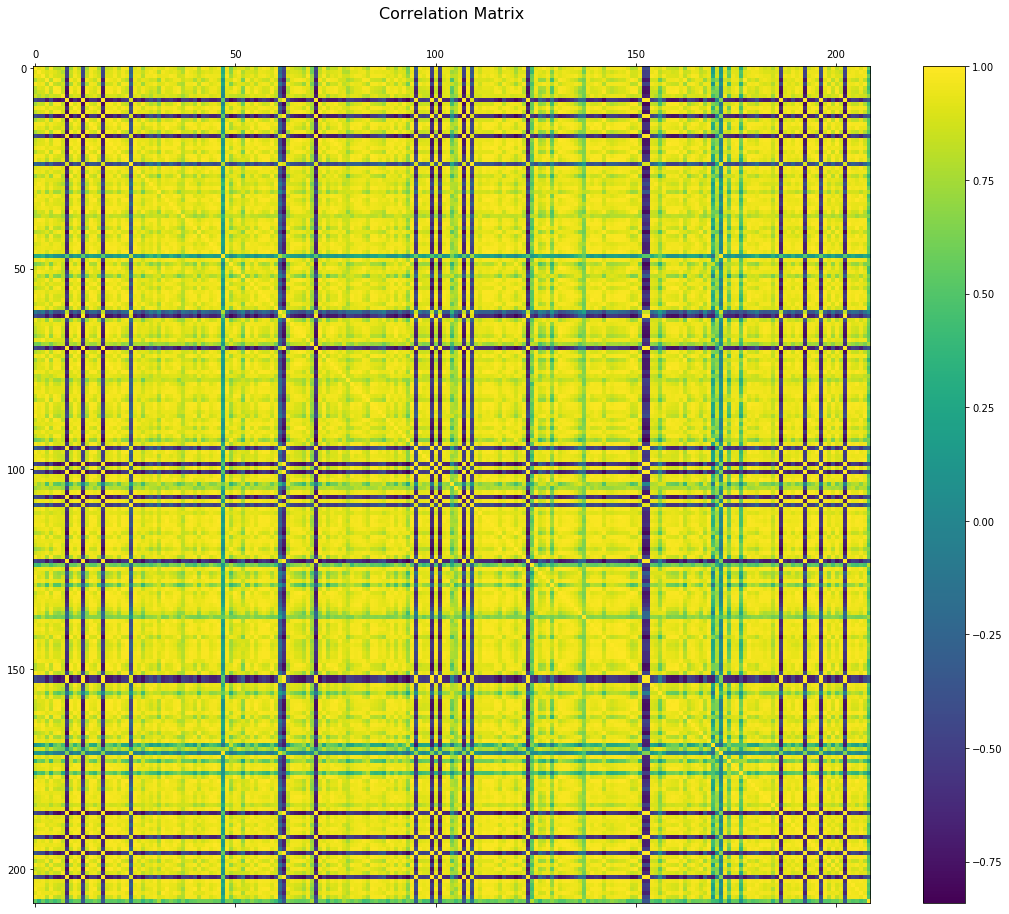

In [256]:
f = plt.figure(figsize=(19, 15))
plt.matshow(pivoted_GDP_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We then try to clusterize this correlation matrix in order to find countries whose GDP are correlated:

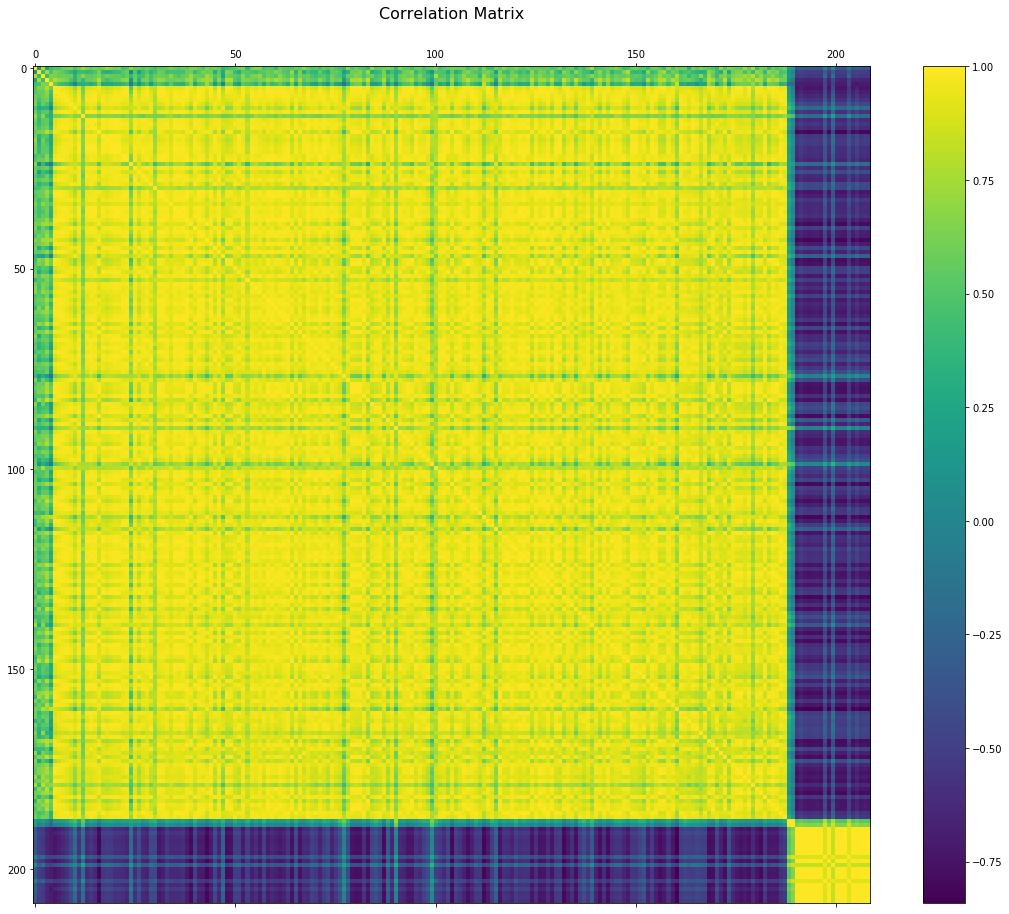

In [257]:
corr = pivoted_GDP_df.corr().values
pdist = spc.distance.pdist(corr)   # vector of ('55' choose 2) pairwise distances
linkage = spc.linkage(pdist, method='complete')
ind = spc.fcluster(linkage, 0.32*pdist.max(), 'distance')
columns = [pivoted_GDP_df.columns.tolist()[i] for i in list((np.argsort(ind)))]
clusterised_df = pivoted_GDP_df.reindex(columns, axis=1)

f = plt.figure(figsize=(19, 15))
plt.matshow(clusterised_df.corr(), fignum=f.number)
cb = plt.colorbar()
cb.ax.tick_params()
plt.title('Correlation Matrix', fontsize=16);

We have found regions in which the GDP is highly correlated and between which the correlation coefficent is lower. We could refine the big clusters by iterating this method.

**Interpretation:** The correlation matrix of GDP contains lots of values that are very closed to one. This means that **GDP in two different countries have a trend to evolve the same way**. Therefore, we can say that the world countries have **strong enough trading relations** to make the GDP evolve the same way. The fact that we have found some **main clusters** could be interpreted as regions in which the **trading relations are more important**.

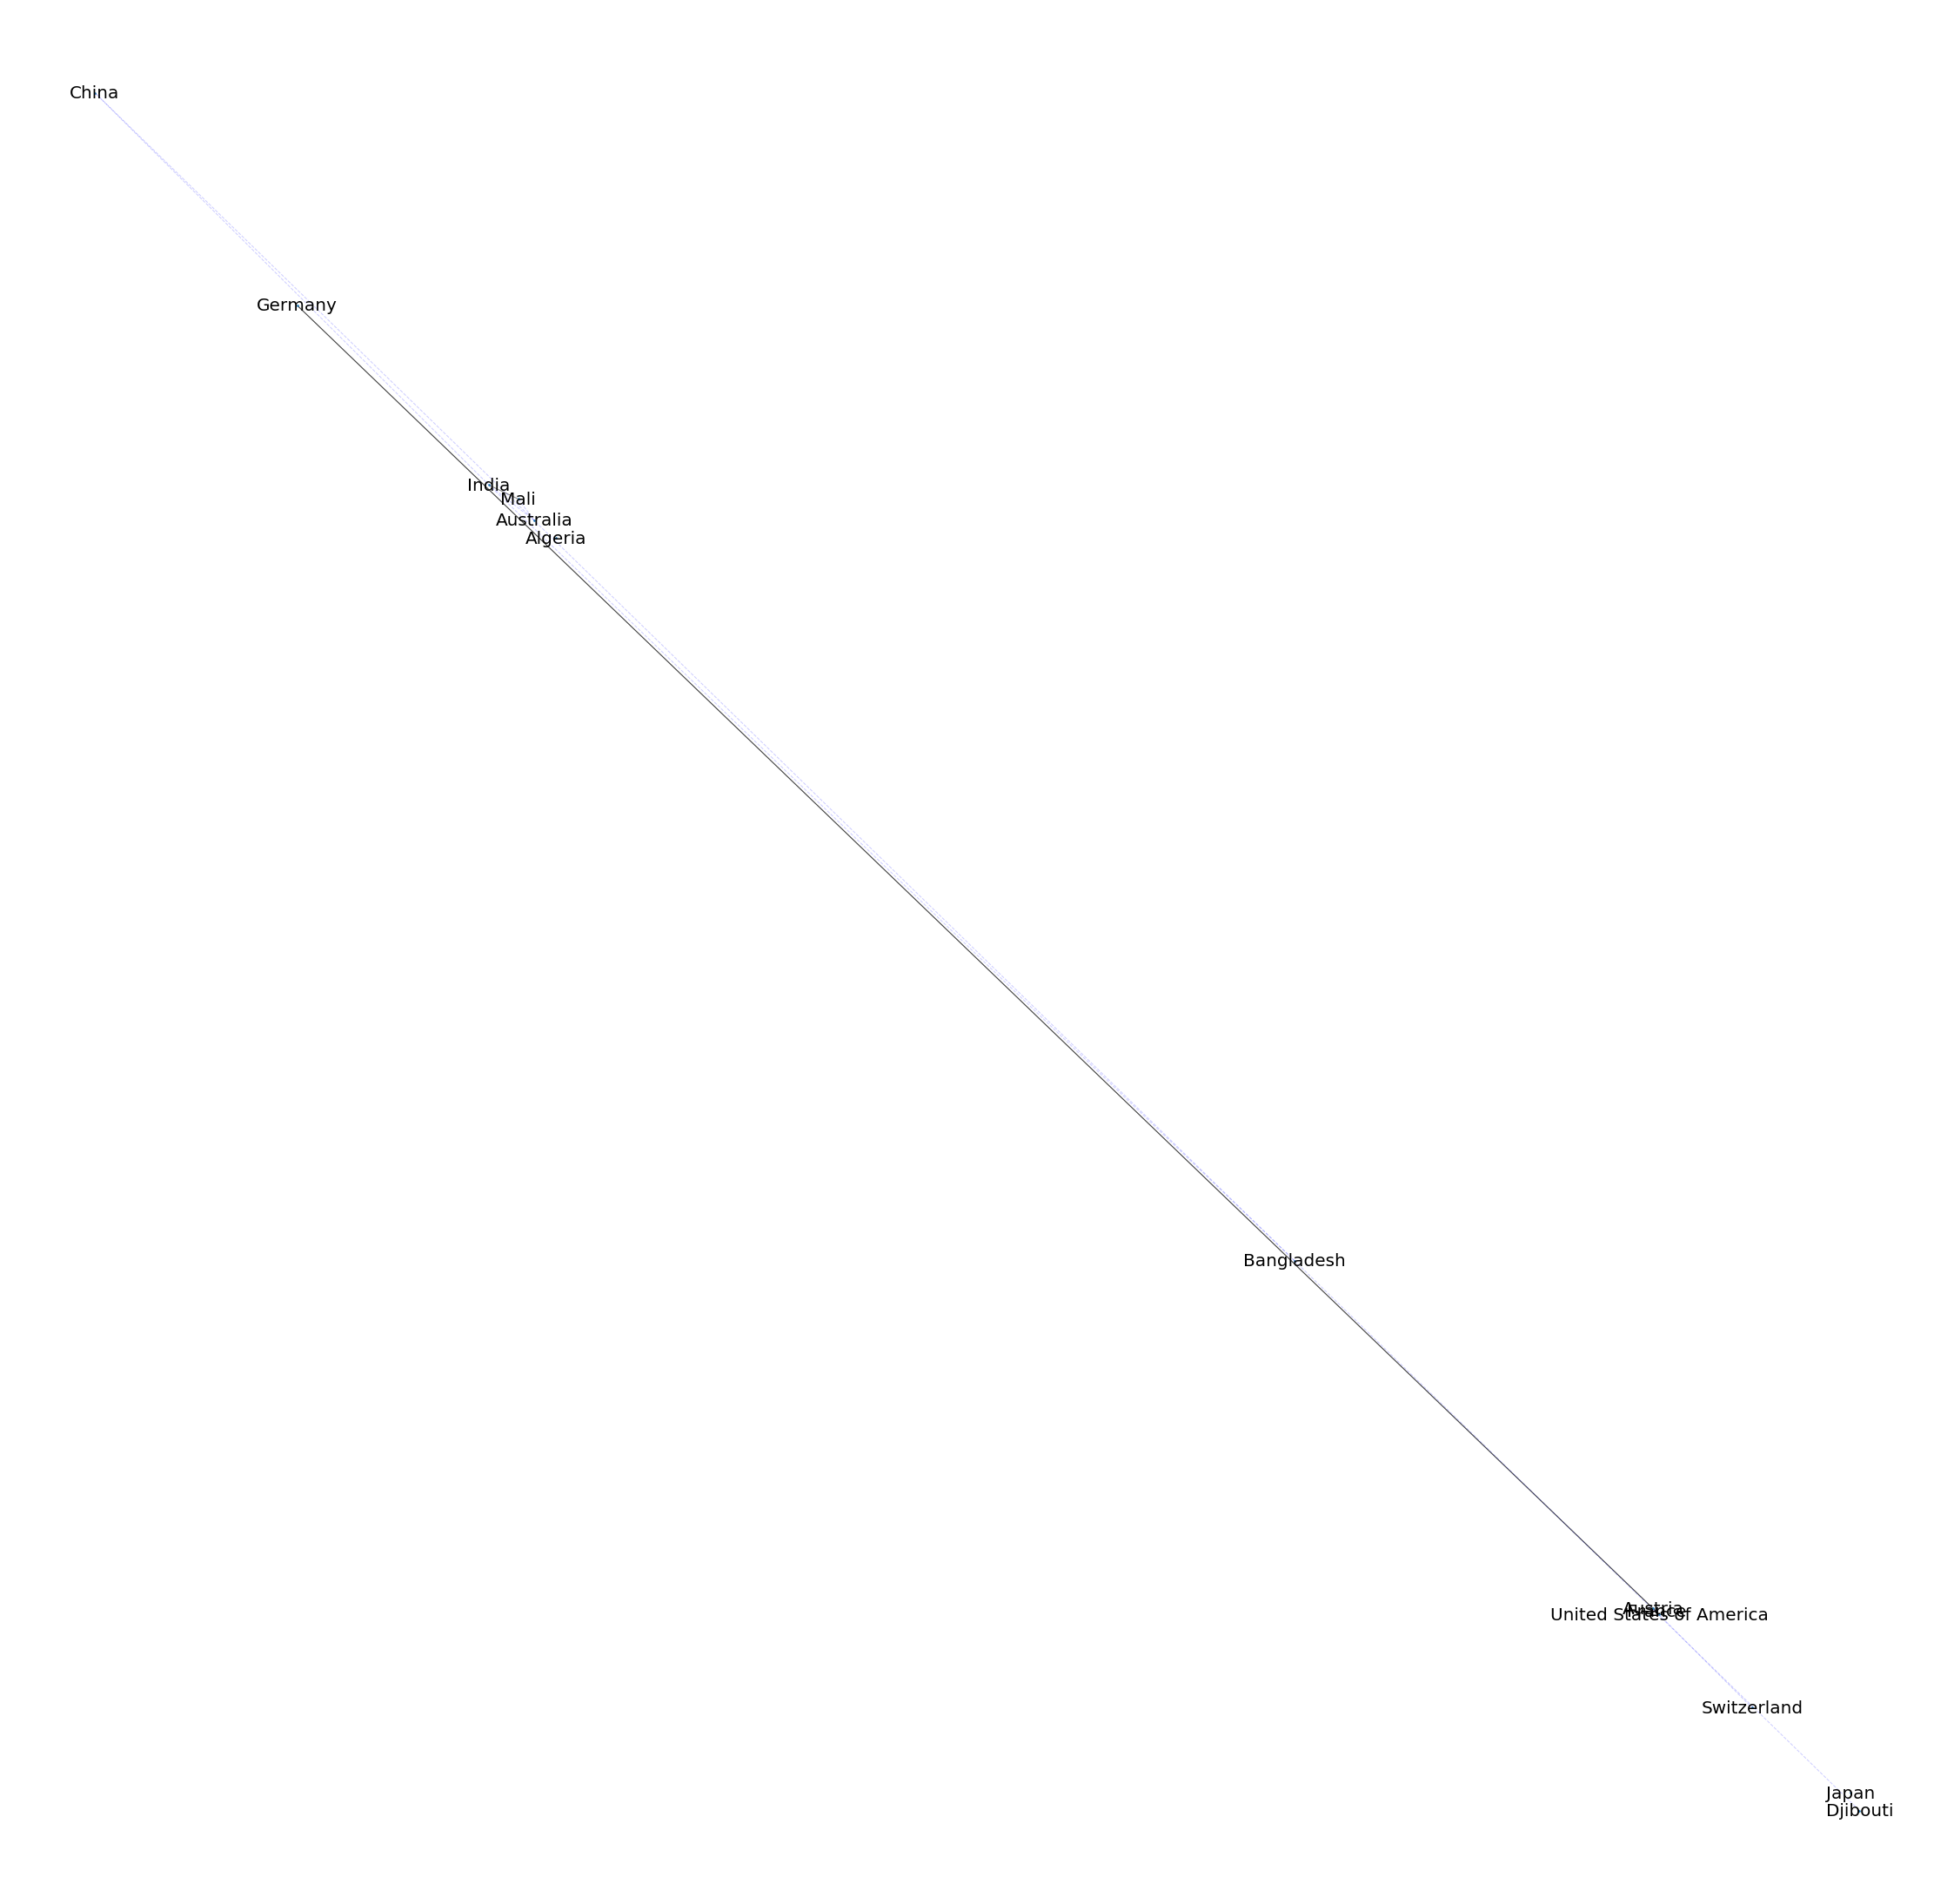

In [258]:
import networkx as nx


plt.figure(figsize=(40,40))

selected_countries = ['Algeria', 'Australia', 'Austria', 'Bangladesh', 'China',
                      'Djibouti', 'France', 'Germany', 'India', 'Japan', 'Mali',
                      'Switzerland', 'United States of America']

G =  nx.from_pandas_adjacency(pivoted_GDP_df[selected_countries].corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.99]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.98 < d['weight'] <= 0.99]

pos = nx.spring_layout(G, k=0.01185)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()


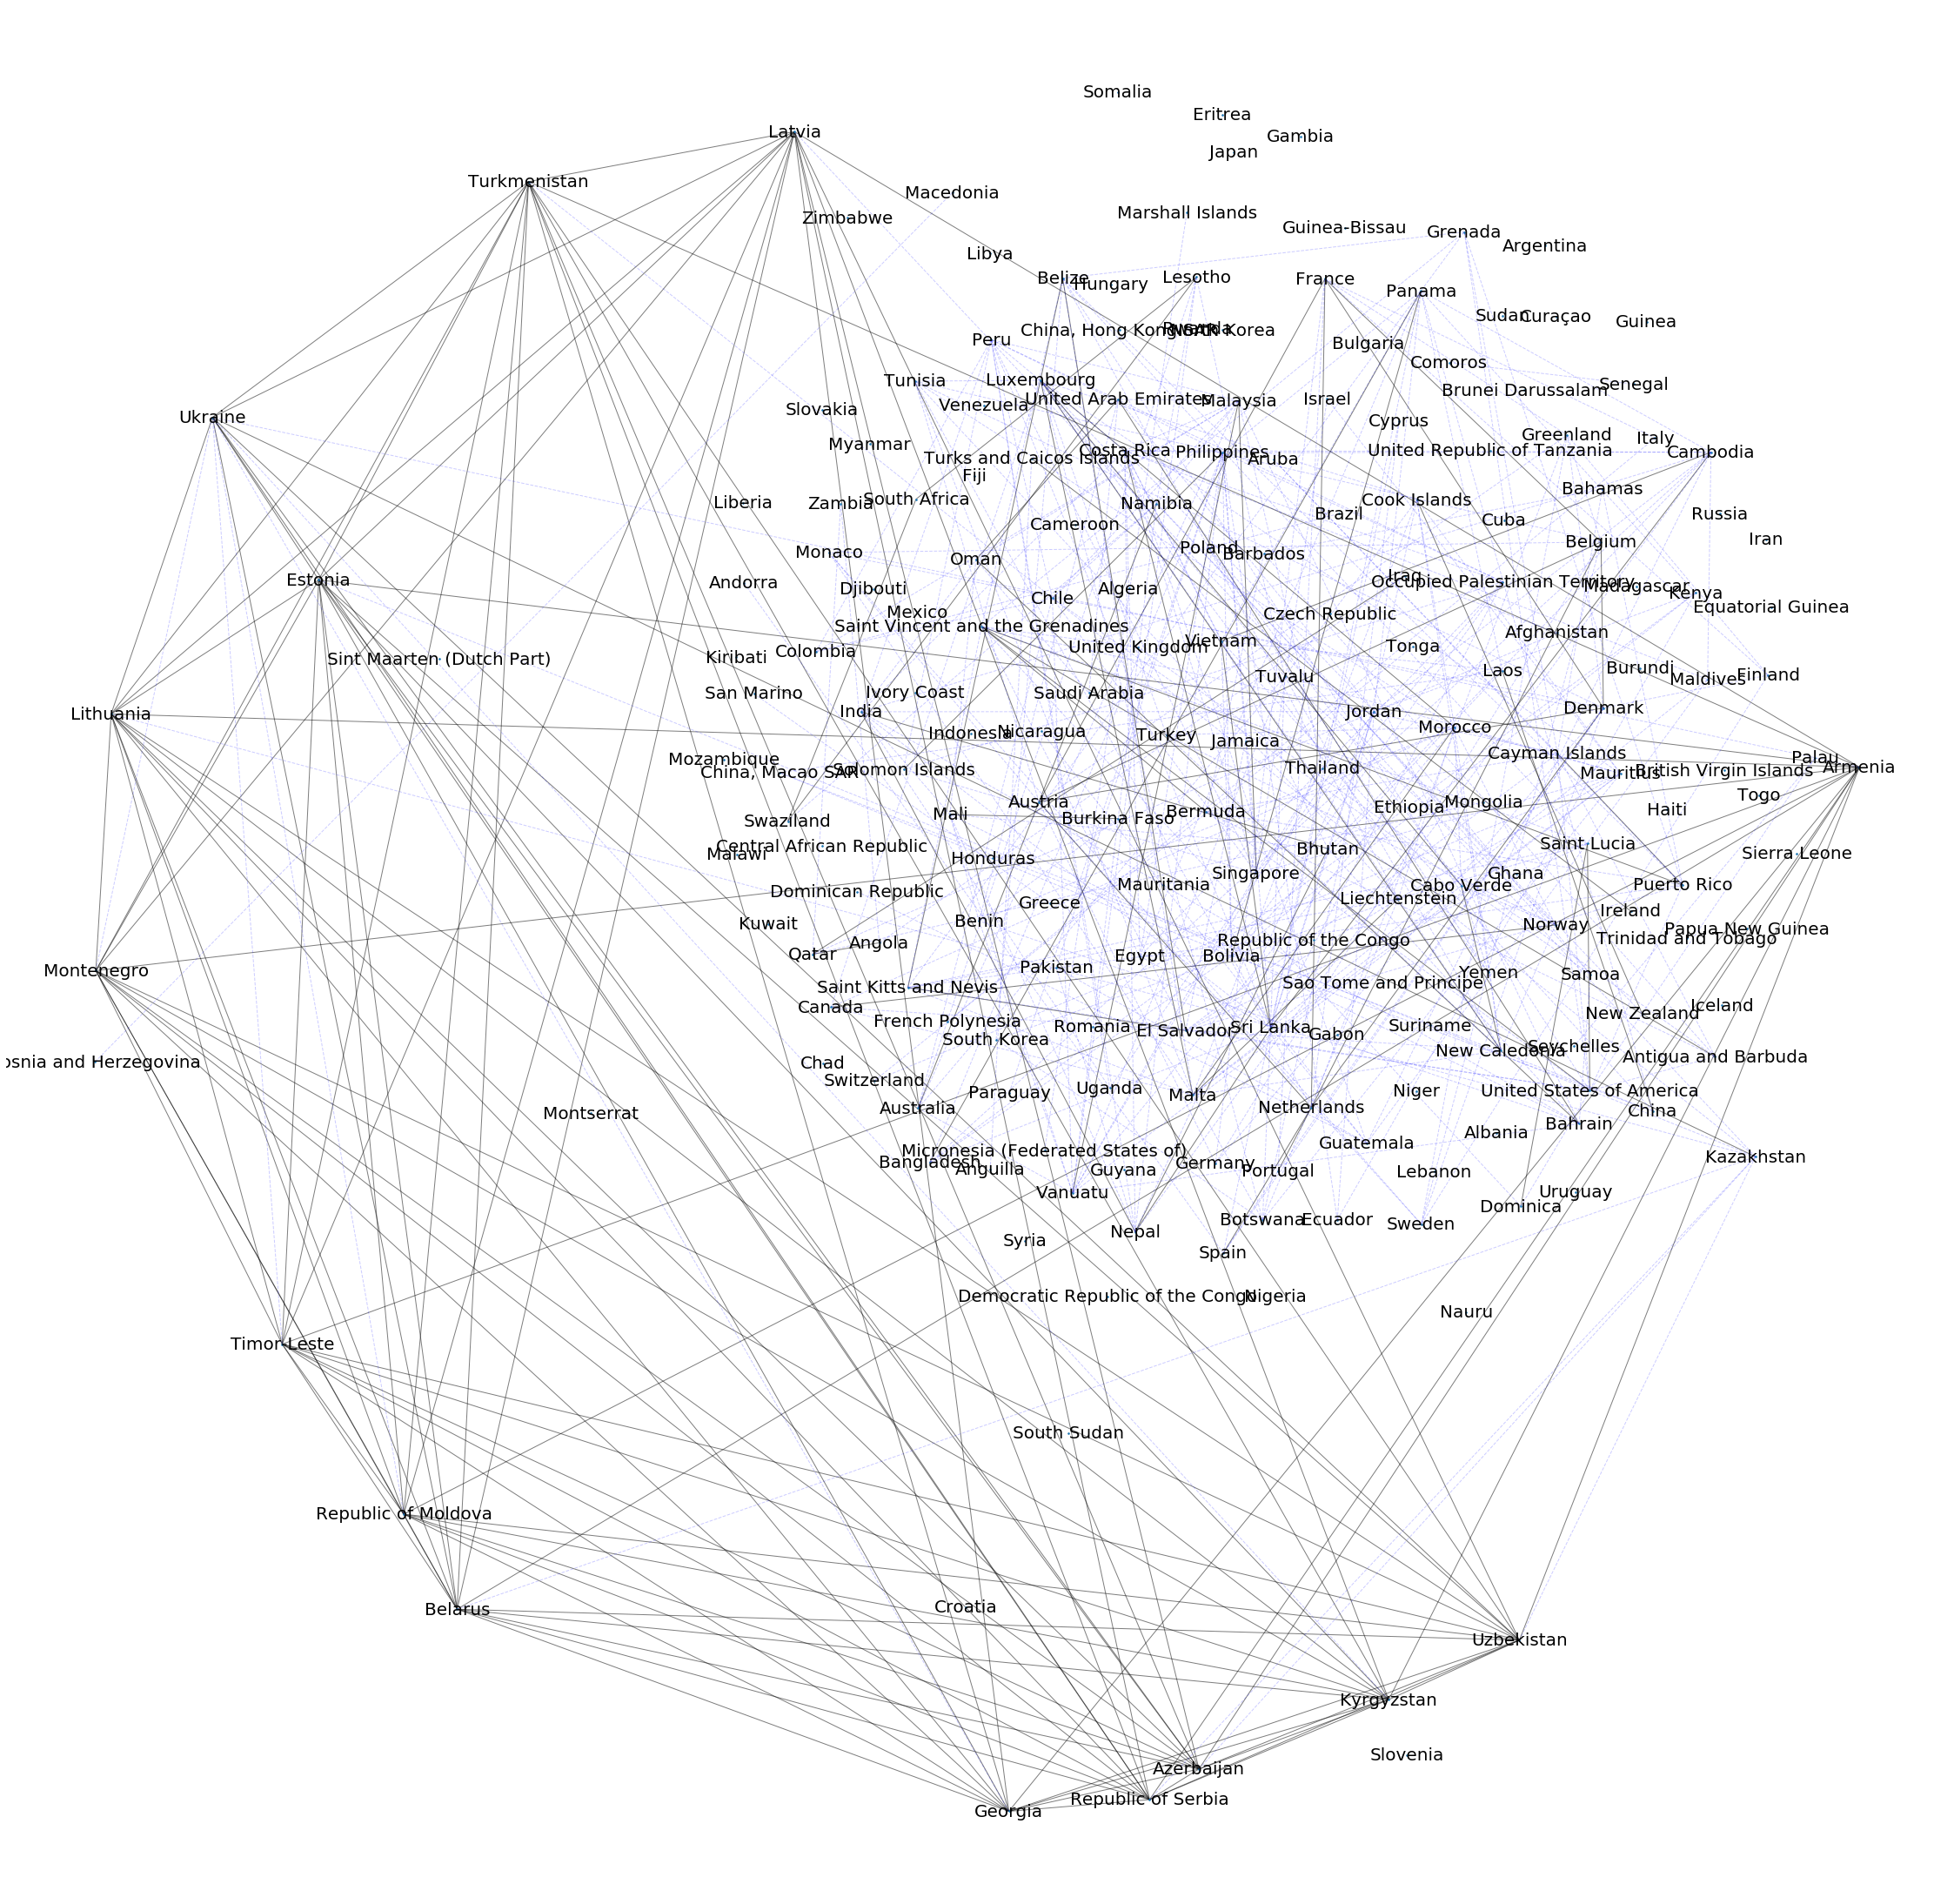

In [259]:
plt.figure(figsize=(40,40))

G =  nx.from_pandas_adjacency(pivoted_GDP_df.corr())

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.995]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if 0.99 < d['weight'] <= 0.995]

pos = nx.spring_layout(G, k=2)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=10, node_shape='.')

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=1, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.2, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

#### 2.D. Economic classification of countries <a name="2D"></a>
Below, we plot the distribution of GDP over the world for the last decades:

In [260]:
plot = uni_df[['Area','Year']]
plot["Value"] = uni_df["(GDP, million $)"]
interact(lambda x: visualise_world_data_folium(plot,'Value',x,'GDP [Mil USD]'),x=(1990,2010,1))

//anaconda3/envs/ada/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


interactive(children=(IntSlider(value=2000, description='x', max=2010, min=1990), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

The countries with high **GDP** indeed correpond to the most **developped countries**. The **trends we can observe** from those plots look **very significant** (USSR dissolution, China economic growth, ...)

# 3. Descriptive analysis <a name='3'></a>
3. 
    1. [Identifying the most important features](#3A)
        1. [Feature selection and model fiting](#3Aa)
        2. [Results](#3Ab)
    2. [Where are the most important features produced?](#3B)
    3. [Who are net importers and exporters of the features of interest?](#3C)
    4. [How is the self sufficiency distributed for the selected features?](#3D)
    

### A. Identifying the most important features<a name='3A'></a>

  a. Feature selection and mode fitting <a name='3Aa'></a>

In [261]:


def create_target_and_covariate_df(path_to_pkl):
    '''
    path_to_pkl: path to the pickle file.
    outputs two dataframes, one for the independant variables one for the dependant variables
    '''
    
    uni_df = pd.read_pickle(path_to_pkl)
    uni_df = uni_df.drop(columns=['Area', 'Year'])
    target_variables_df = uni_df[['(GDP, million $)', '(Consumer price indices, %)']]
    covariates_df = uni_df.drop(columns=['(GDP, million $)', '(Consumer price indices, %)'])
    
    return covariates_df, target_variables_df


def drop_feature_pearson_correlation(threshold, target_variable, target_variable_name, dataframe):
    
    '''
    threshold: the minimum amount of correlation required to keep the feature
    target_variable_name: string GDP or CPI
    normalised_dataset: the normalised dataset of feature
    target_variable: pandas series that contains the value of the target_varibale_name
    that we add to the normalised dataset
    
    '''
    copy_dataframe = dataframe.copy()
    copy_dataframe[target_variable_name] = target_variable
    cor = copy_dataframe.corr()
    cor_target = abs(cor[target_variable_name])
    
    relevant_features = cor_target[cor_target > threshold]
    
    return list(relevant_features.keys())

def drop_too_corelated_featues(threshold, dataframe):
    
    corr_matrix = dataframe.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return dataframe.drop(dataframe[to_drop], axis=1)
    

def feature_augmentation(degree, covariates_df):
    poly = PolynomialFeatures(degree)
    output_nparray =  poly.fit_transform(covariates_df)

    
    output_df = pd.DataFrame(output_nparray, columns = poly.get_feature_names(covariates_df.columns))
    
    return output_df

def split_and_standardization_dataset(target_variables, covariates, test_size, random, type_return = 'numpy'  ):
    
    '''
    
    target_variables: pandas dataframe that contains the target variables
    covariates: pandas dataframe that contains the independant variables
    test_size: the proportion of the dataset to include in the test split
    type_return: 'numpy' if return numpy array, 'pandas' if return pandas dataframe
    '''
    target_variables_numpy = target_variables.to_numpy()
    covariates_numpy = covariates.to_numpy()
    X_train, X_test, Y_train, Y_test = train_test_split(covariates_numpy, target_variables_numpy, test_size=test_size, random_state = random)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_normalized = scaler.transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    if type_return == 'numpy':
        
        return X_train_normalized, X_test_normalized, Y_train, Y_test
    
    elif type_return == 'pandas':
        
        X_test_normalized_df = pd.DataFrame(X_test_normalized, columns = list(covariates.columns))
        X_train_normalized_df = pd.DataFrame(X_train_normalized,columns= list(covariates.columns))
        Y_train_df = pd.DataFrame(Y_train, columns= list(target_variables.columns))
        Y_test_df = pd.DataFrame(Y_test, columns= list(target_variables.columns))
        
        return X_train_normalized_df, X_test_normalized_df, Y_train_df, Y_test_df

def fit_model_lasso(regularisation_parameters, covariates_df, target_df, nb_fold_CV):
    
    lasso = Lasso()
    
    parameters = {'alpha': regularisation_parameters}
    
    lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = nb_fold_CV)
    lasso_regressor.fit(covariates_df, target_df)

    best_param = lasso_regressor.best_params_['alpha']
    print('The best regularization parameter is ', best_param)


    lasso = Lasso(alpha=best_param)
    lasso.fit(covariates_df, target_df)
    return lasso.coef_
    
    
    
def RFECV_lasso_2(covariate, target,  random, nb_fold = 5,):
    
    cols = list(covariate.columns)
    X_train_, X_test_, Y_train_, Y_test_ = split_and_standardization_dataset(target, covariate, 0.2, type_return='numpy', random = random)
    #print('shape of Y_train_', Y_train_.shape, 'type of Y_train_', type(Y_train_))
    model = Lasso()
    
    rfecv = RFECV(estimator = model, step = 1, cv = nb_fold, scoring = 'neg_mean_squared_error')
    rfecv.fit(X_train_, np.ravel(Y_train_))
    print("Optimal number of features : %d" % rfecv.n_features_)
    
    temp = pd.Series(rfecv.support_,index = cols)
    selected_features = temp[temp==True].index

    print(selected_features)
    

    # plt.figure()
    # plt.xlabel("Number of features selected")
    # plt.ylabel("Cross validation score")
    # plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    # plt.show()
        
    return selected_features



    



In [262]:
def main(target_to_inspect = '(GDP, million $)'):

    RANDOM_SEED = 29
    
    reg_param = np.linspace(start = 0.01, stop= 1, num = 20)

    params = {

        'target' : target_to_inspect ,
        'name of target': 'GDP',
        'pearson correlation threshold': 0.4,
        'inter correlation threshold': 0.9, 
        'nb_fold_CV': 5, 
        'degree augmentation': 1,
        'regularization_parameter': reg_param
    }

    covariates_df, target_variables_df = create_target_and_covariate_df('./Scripts/Data/uni_df.pkl')
    target_variables_df.to_pickle('target.pkl')

    ### Below we select the top 20 features in production:

    Production_cov_df = covariates_df.filter(regex= 'production|Production')
    summed_df = Production_cov_df.sum()
    keys = summed_df.keys()
    values = summed_df.values
    sorted_keys = [key for _,key in sorted(zip(values,keys))]
    Production_cov_df = Production_cov_df[sorted_keys[-20:]]
    selected_features_production = list(Production_cov_df.columns.values) # Selected features for top 20 prod features in volumne

    cropped_word_selected_prod = [" ".join(string.split()[:-3]) for string in selected_features_production] # Same as the list above with only the important words kept


    

   ### Below we are selecting the features in export that have been selected previously with the production
    export_df = covariates_df.filter(regex= 'export')
    

    columns_to_keep_export = []

    for column_export in list(export_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_export:

                columns_to_keep_export.append(column_export)


    ### Below we are selecting the features in import that have been selected previously with the production
    import_df = covariates_df.filter(regex= 'import')
    

    columns_to_keep_import = []

    for column_import in list(import_df.columns.values):

        for columns_prod in cropped_word_selected_prod:

            if columns_prod in column_import:

                columns_to_keep_import.append(column_import)

    


    final_features_kept = selected_features_production + columns_to_keep_export + columns_to_keep_import  # All the selected features
   
    covariates_df = covariates_df[final_features_kept]
    


    list_selected_features_GDP = drop_feature_pearson_correlation(params['pearson correlation threshold'], target_variables_df[params['target']], params['name of target'], covariates_df)
    covariate_reduced_df = covariates_df[list_selected_features_GDP[:-1]]
    covariate_reduced_df = drop_too_corelated_featues(params['inter correlation threshold'], covariate_reduced_df)
    covariate_reduced_df.to_pickle("reduced_df_2.pkl")
    print('list of selected features after reduction', list(covariate_reduced_df.columns.values))
    
    regularisation_parameters = params['regularization_parameter']

    target_df = target_variables_df[params['target']]

    nb_fold_CV = params['nb_fold_CV']

    param_lasso = fit_model_lasso(regularisation_parameters, covariate_reduced_df, target_df, nb_fold_CV = nb_fold_CV )

    keys = list(covariate_reduced_df.columns.values)
    
    values = param_lasso
   
    return dict(zip(keys, values))

weights=main('(GDP, million $)')

list of selected features after reduction ['Soybeans Crops Production tonnes', 'Tomatoes Crops Production tonnes', 'Maize Crops Production tonnes', 'Turkeys Livestock production Head', 'Maize Food export quantities tonnes', 'Maize, green Food export quantities tonnes', 'Wheat Food export quantities tonnes', 'Cattle Live animals import quantities Head', 'Oats Food import quantities tonnes', 'Pigs Live animals import quantities Head', 'Tomatoes Food import quantities tonnes', 'Turkeys Live animals import quantities Head']


//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88269505930363.5, tolerance: 616213877638.2041
  positive)
//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52106333384857.0, tolerance: 641076863381.032
  positive)


The best regularization parameter is  0.01


//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25251481765867.0, tolerance: 650584559072.4933
  positive)
//anaconda3/envs/ada/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25251481765867.0, tolerance: 650584559072.4933
  positive)


In [263]:
weights

{'Soybeans Crops Production tonnes': 0.016904551719883004,
 'Tomatoes Crops Production tonnes': 0.04600299893471108,
 'Maize Crops Production tonnes': 0.019112555979080598,
 'Turkeys Livestock production Head': 0.00045609049200977524,
 'Maize Food export quantities tonnes': -0.06316454222878906,
 'Maize, green Food export quantities tonnes': 52.082838493928676,
 'Wheat Food export quantities tonnes': 0.0075799594660751575,
 'Cattle Live animals import quantities Head': 0.03663454785851955,
 'Oats Food import quantities tonnes': 0.48376570716305617,
 'Pigs Live animals import quantities Head': 0.05776106945901765,
 'Tomatoes Food import quantities tonnes': 2.5686557773141767,
 'Turkeys Live animals import quantities Head': 0.04929538371588062}

**Above, we see the features identified as the most important by our regression model**

We find that the  goods that most influence the GDP are soybean, tomatoes, Maize, Wheat , Cattle live animals and pigs amongst other. 

It is an interesting result that is easily understandable. Take soybean for example. This crop is one of the most produced. The mains exporter are the US, Brasil and Argentina and the main importer is China. Around 330 millions tonnes of soybean was produced in 2018. It is vastly used to feed animals. It is thus coherent to see such an important good be selected by our model. We see also that wheat, oats, cattle live and pigs are present. This again is easily understandable. It is sufficient to look at our eating habit to convince ourself that those goods plays an important role in the GDP. 

## B. Where are the most important features produced? <a name='3B'></a>

After having identified the most important features with our prediction model, we want to have a look as to where they are produced.  

The first step is to select to columns corresponding to the production of the features of interest within our dataframe.

In [264]:
features=list(weights.keys())
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
df=df.set_index(['Area','Year'])

#To select the production of the features of interest, the dataframe is filtered with each feature. To reduce computation cost, the result is stored in a dictionnary and when all the features are treated turned into
#a pandas DataFrame

dic_to_plot={}

for feature in features:
    
    if 'Production' in feature or 'production' in feature:
        if len(df.filter(regex=feature).columns)==0:
            print('{} not found'.format(c))
        else:
            dic_to_plot.update(df.filter(regex=feature).to_dict())
            
    else:
        s=re.split(' Food| Live',feature)[0]
        cols=[c for c in df.columns if re.split(' Crop| Food| Live',c)[0]==s and re.search('Production|production',c)]
        
        if cols==0:
            print('{} not found'.format(feature))
        else:
            dic_to_plot.update(df[cols].to_dict())
            
prod_to_plot=pd.DataFrame(dic_to_plot)
prod_to_plot=prod_to_plot.reset_index().rename(columns={'level_0':'Area','level_1':'Year'})

#### Let's dive into the maps!

In [265]:
columns=[c for c in prod_to_plot.columns if c!='Area' and c!='Year']
for c in columns:
    print(c)
    display(interact(lambda x : visualise_world_data_folium(prod_to_plot,c,x,c,log2=True),x=(1970,2014,1)))


Soybeans Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Tomatoes Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Turkeys Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize, green Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Wheat Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Cattle Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Oats Crops Production tonnes


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Pigs Livestock production Head


interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

### TODO: Analysis (Julien)

In [266]:
#Exporting the results as HTML files
import os
import shutil

#Generate result files

#if needed, creating result directory
if not os.path.exists('./Scripts/Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
if not os.path.exists('./Scripts/Data/ResultsJulien/Producers'):
        os.mkdir('./Scripts/Data/ResultsJulien/Producers')
        
for c in prod_to_plot.columns:
    if c!='Year' and c!='Area':
        
        #if the dir already exists, remove it and create fresh one
        if os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            shutil.rmtree('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        #wait for the deletion to be complete
        while os.path.exists('./Scripts/Data/ResultsJulien/Producers/{}'.format(c)):
            continue
        os.mkdir('./Scripts/Data/ResultsJulien/Producers/{}'.format(c))
        
        for year in range(1970,2015,1):
            m=visualise_world_data_folium(prod_to_plot,c,year,c,log2=True)
            save_name='./Scripts/Data/ResultsJulien/Producers/{}/{}_{}.html'.format(c,c,year)
            m.save(save_name)

## C.  Who are the importers and exporters of the features of interest? <a name="3C"></a>

For the next milestone, this part will be put to the end of the file and conducted for **specific agricultural features** (e.g. trade of crop most highly correlated to GDP) after the **most important ones** have been **identified**.

In [267]:
def net_import_export(uni_df,weights):
    
    #This method return a dataframe containing the net trade balance for each country for each year for the features of interest
    
    exports_df=uni_df.set_index(['Area','Year']).filter(regex="export")
    imports_df=uni_df.set_index(['Area','Year']).filter(regex="import")

    e_cols=[]
    i_cols=[]
    popped=[]
    for feature in weights.keys():
        if feature not in popped:
            s=re.split(' Food| Live| Crops',feature)[0]
            for f in features:
                f_split=re.split(' Food| Live| Crops',f)[0]
                if f_split==s:
                    popped.append(f)
            e_cols.extend([c for c in list(exports_df.columns) if re.split(' Food| Live| Crops',c)[0]==s])
            i_cols.extend([c for c in list(imports_df.columns) if re.split(' Food| Live| Crops',c)[0]==s])

    exports_df=exports_df[e_cols]
    imports_df=imports_df[i_cols]

    e_col_dic={c:re.split(' Food| Live| Crops',c)[0] for c in exports_df.columns}
    i_col_dic={c:re.split(' Food| Live| Crops',c)[0] for c in imports_df.columns}



    exports_df=exports_df.rename(columns=e_col_dic)
    imports_df=imports_df.rename(columns=i_col_dic)

    net_df=exports_df.subtract(imports_df)
    
    return net_df

In [268]:
net_df =net_import_export(uni_df,weights)
net_df.reset_index(inplace=True)

for c in net_df.columns:
    if c!='Year' and c!='Area':
        print(c,'\n')
        display(interact(lambda x : visualise_world_data_folium(net_df,c,x,c+" [Tonnes or Heads]",log2=True),x=(1970,2014,1)))

Soybeans 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Tomatoes 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Turkeys 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Maize, green 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Wheat 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Cattle 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Oats 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

Pigs 



interactive(children=(IntSlider(value=1992, description='x', max=2014, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

## D. How is the self sufficiency distributed for the selected features? <a name="3D"></a>
In this chapter, we take a look at the self suficiency score of the countries around the world and we focus on the agricultural features identified by our model.

In [269]:
pickle_file="Scripts/Data/uni_df.pkl"
df=pickle.load(open(pickle_file,'rb'))
sc=compute_self_suficiency(df,weights)
sc.reset_index(inplace=True)
sc=sc.rename(columns={'level_0':'Area','level_1':'Year'})

Soybeans Crops Production tonnes weight : 0.016904551719883004 agg from: {'Soybeans Crops Production tonnes': 0.016904551719883004}
Tomatoes Crops Production tonnes weight : 2.6146587762488878 agg from: {'Tomatoes Crops Production tonnes': 0.04600299893471108, 'Tomatoes Food import quantities tonnes': 2.5686557773141767}
Maize Crops Production tonnes weight : -0.044051986249708464 agg from: {'Maize Crops Production tonnes': 0.019112555979080598, 'Maize Food export quantities tonnes': -0.06316454222878906}
Turkeys Livestock production Head weight : 0.04975147420789039 agg from: {'Turkeys Livestock production Head': 0.00045609049200977524, 'Turkeys Live animals import quantities Head': 0.04929538371588062}
Maize, green Food export quantities tonnes weight : 52.082838493928676 agg from: {'Maize, green Food export quantities tonnes': 52.082838493928676}
Wheat Food export quantities tonnes weight : 0.0075799594660751575 agg from: {'Wheat Food export quantities tonnes': 0.0075799594660751575

In [270]:
interact(lambda x: visualise_world_data_folium(sc,'Agg',x,'Self Sufficiency score',log2=True),x=(1970,2015))

interactive(children=(IntSlider(value=1992, description='x', max=2015, min=1970), Output()), _dom_classes=('wi…

<function __main__.<lambda>(x)>

In [271]:
# This field generates the results and exports them as HTML files (1 map per year)

import os
import shutil

#Generate result files

#if needed, create result directories
if not os.path.exists('./Scripts//Data/ResultsJulien'):
    os.mkdir('./Scripts/Data/ResultsJulien')
    
#if directory already exists delete it
if os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    shutil.rmtree('./Scripts/Data/ResultsJulien/SelfSufficiency')

#While loop necessary to wait until the tree is deleted
while os.path.exists('./Scripts/Data/ResultsJulien/SelfSufficiency'):
    continue
    
os.mkdir('./Scripts/Data/ResultsJulien/SelfSufficiency')
    

for year in range(1970,2016,1):
            m=visualise_world_data_folium(sc,'Agg',year,'Self Sufficiency Score',log2=True)
            save_name='./Scripts/Data/ResultsJulien/SelfSufficiency/self_suf_{}.html'.format(year)
            m.save(save_name)